Sports Analytics
==================

**Using Fifa17 Official Dataset Predict Player Performance**

__The dataset contains 63 columns, each representing a different attribute of a football player.__

## Columns

**ID**: A unique identifier for each player.  
**Name**: The player's full name.  
**Age**: The player's age.  
**Photo**: A URL to the player's photo.  
**Nationality**: The player's nationality.  
**Flag**: A URL to the flag of the player's country.  
**Overall**: The player's overall rating based on various attributes.  
**Potential**: The player's potential rating, which indicates their peak performance.  
**Club**: The name of the club the player is currently playing for.  
**Club Logo**: A URL to the logo of the player's club.  
**Value**: The player's estimated market value.  
**Wage**: The player's weekly wage.  
**Special**: A special rating based on how unique or outstanding the player's skills are.  
**Preferred Foot**: Whether the player prefers their left or right foot.  
**International Reputation**: A score indicating the player's international reputation (higher means more well-known globally).  
**Weak Foot**: The player's skill level with their non-dominant foot.  
**Skill Moves**: The player's proficiency with skill moves (rated out of 5 stars).  
**Work Rate**: The player's work rate in both attack and defense (e.g., "High/Medium").  
**Body Type**: The player's physical build (e.g., lean, stocky).  
**Real Face**: Whether the player's face is realistically rendered in the game (True/False).  
**Position**: The player's primary playing position (e.g., ST, CM).  
**Jersey Number**: The player's squad number.  
**Joined**: The date the player joined their current club.  
**Loaned From**: The club the player is loaned from (if applicable).  
**Contract Valid Until**: The year the player's contract with their current club expires.  
**Height**: The player's height (in feet and inches).  
**Weight**: The player's weight (in pounds).  
**Crossing**: The player's ability to deliver accurate crosses.  
**Finishing**: The player's ability to score from chances.  
**HeadingAccuracy**: The player's accuracy with headers.  
**ShortPassing**: The player's ability to pass the ball accurately over short distances.  
**Volleys**: The player's ability to strike the ball mid-air (volleys).  
**Dribbling**: The player's ability to move with the ball while controlling it closely.  
**Curve**: The player's ability to bend the ball in the air (curve shots or passes).  
**FKAccuracy**: The player's ability to take accurate free kicks.  
**LongPassing**: The player's ability to deliver long-distance passes accurately.  
**BallControl**: The player's ability to control the ball in various situations.  
**Acceleration**: How quickly the player can reach top speed.  
**SprintSpeed**: The player's top running speed.  
**Agility**: How quickly the player can change direction.  
**Reactions**: The player's reaction time to in-game events.  
**Balance**: The player's ability to maintain balance, especially in duels or when dribbling.  
**ShotPower**: The power behind the player's shots.  
**Jumping**: The player's jumping ability.  
**Stamina**: The player's endurance, representing how long they can maintain their energy.  
**Strength**: The player's physical strength in duels.  
**LongShots**: The player's accuracy when shooting from long distances.  
**Aggression**: The player's intensity in challenging for the ball.  
**Interceptions**: The player's ability to read the game and intercept passes.  
**Positioning**: The player's ability to position themselves well on the field.  
**Vision**: The player's awareness of their teammates' positions.  
**Penalties**: The player's accuracy in taking penalty kicks.  
**Composure**: The player's ability to remain calm under pressure.  
**Marking**: The player's ability to mark opponents effectively.  
**StandingTackle**: The player's skill at standing tackles.  
**SlidingTackle**: The player's skill at sliding tackles.  
**GKDiving**: (Goalkeepers only) The goalkeeper's diving ability.  
**GKHandling**: (Goalkeepers only) The goalkeeper's ability to catch the ball.  
**GKKicking**: (Goalkeepers only) The goalkeeper's kicking accuracy and distance.  
**GKPositioning**: (Goalkeepers only) The goalkeeper's positioning awareness.  
**GKReflexes**: (Goalkeepers only) The goalkeeper's reaction speed.  
**Best Position**: The player's best-suited position on the field.  
**Best Overall Rating**: The player's highest rating based on different positions.

## Imports & Data Input

In [6370]:
import re
import math
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# To prevent the output from being truncated
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6371]:
df = pd.read_csv("FIFA17_official_data.csv")

# Preliminary Data Analysis

## Data Understanding

In [6372]:
print("Number of rows: ",df.shape[0])
print("Number of columns: ",df.shape[1])

Number of rows:  17560
Number of columns:  63


<b> The dataset contains data for 17,560 players, with 63 different features for each player. </b>

In [6373]:
df.head()

ID            Name  Age  \
0  176580       L. Suárez   29   
1  178518   R. Nainggolan   28   
2  181872        A. Vidal   29   
3  197445        D. Alaba   24   
4  195864        P. Pogba   23   

                                              Photo Nationality  \
0  https://cdn.sofifa.com/players/176/580/17_60.png     Uruguay   
1  https://cdn.sofifa.com/players/178/518/17_60.png     Belgium   
2  https://cdn.sofifa.com/players/181/872/17_60.png       Chile   
3  https://cdn.sofifa.com/players/197/445/17_60.png     Austria   
4  https://cdn.sofifa.com/players/195/864/17_60.png      France   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.com/flags/uy.png       92         92       FC Barcelona   
1  https://cdn.sofifa.com/flags/be.png       86         86               Roma   
2  https://cdn.sofifa.com/flags/cl.png       87         87  FC Bayern München   
3  https://cdn.sofifa.com/flags/at.png       86         89  FC Bayern München   
4  https://cdn.sofifa.com/flags/fr.png       88         94  Manchester United   

                                       Club Logo   Value   Wage  Special  \
0  https://cdn.sofifa.com/teams/241/light_30.png    €83M  €525K     2291   
1   https://cdn.sofifa.com/teams/52/light_30.png  €37.5M  €130K     2290   
2   https://cdn.sofifa.com/teams/21/light_30.png  €41.5M  €180K     2285   
3   https://cdn.sofifa.com/teams/21/light_30.png  €41.5M  €140K     2279   
4   https://cdn.sofifa.com/teams/11/light_30.png  €71.5M  €225K     2271   

  Preferred Foot  International Reputation  Weak Foot  Skill Moves  \
0          Right                       5.0        4.0          4.0   
1          Right                       3.0        3.0          3.0   
2          Right                       4.0        4.0          3.0   
3           Left                       4.0        4.0          3.0   
4          Right                       4.0        4.0          5.0   

      Work Rate         Body Type Real Face                     Position  \
0  High/ Medium  Normal (170-185)       Yes   <span class="pos pos25">ST   
1    High/ High  Stocky (170-185)        No   <span class="pos pos22">LF   
2    High/ High  Normal (170-185)       Yes  <span class="pos pos11">LDM   
3  High/ Medium    Lean (170-185)       Yes    <span class="pos pos7">LB   
4  High/ Medium       Lean (185+)       Yes  <span class="pos pos11">LDM   

   Jersey Number        Joined Loaned From Contract Valid Until Height  \
0            9.0  Jul 11, 2014         NaN                 2021    6'0   
1            4.0   Jan 7, 2014         NaN                 2021    5'9   
2           23.0  Jul 28, 2015         NaN                 2019   5'11   
3           27.0  Feb 10, 2010         NaN                 2021   5'11   
4            6.0   Aug 9, 2016         NaN                 2021    6'3   

   Weight  Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  \
0  190lbs      77.0       94.0             77.0          83.0     88.0   
1  143lbs      73.0       76.0             59.0          84.0     75.0   
2  165lbs      76.0       77.0             81.0          84.0     78.0   
3  168lbs      82.0       63.0             75.0          83.0     68.0   
4  185lbs      78.0       71.0             73.0          85.0     84.0   

   Dribbling  Curve  FKAccuracy  LongPassing  BallControl  Acceleration  \
0       86.0   86.0        84.0         64.0         91.0          88.0   
1       80.0   73.0        68.0         81.0         85.0          81.0   
2       76.0   76.0        68.0         82.0         83.0          77.0   
3       79.0   78.0        83.0         80.0         83.0          86.0   
4       89.0   84.0        82.0         88.0         90.0          75.0   

   SprintSpeed  Agility  Reactions  Balance  ShotPower  Jumping  Stamina  \
0         77.0     86.0       93.0     60.0       87.0     69.0     89.0   
1         78.0     81.0       87.0     84.0       84.0     76.0     94.0   
2       

In [6374]:
# single record
df.head(1).T

0
ID                                                                  176580
Name                                                             L. Suárez
Age                                                                     29
Photo                     https://cdn.sofifa.com/players/176/580/17_60.png
Nationality                                                        Uruguay
Flag                                   https://cdn.sofifa.com/flags/uy.png
Overall                                                                 92
Potential                                                               92
Club                                                          FC Barcelona
Club Logo                    https://cdn.sofifa.com/teams/241/light_30.png
Value                                                                 €83M
Wage                                                                 €525K
Special                                                               2291
Preferred Foot                                                       Right
International Reputation                                               5.0
Weak Foot                                                              4.0
Skill Moves                                                            4.0
Work Rate                                                     High/ Medium
Body Type                                                 Normal (170-185)
Real Face                                                              Yes
Position                                        <span class="pos pos25">ST
Jersey Number                                                          9.0
Joined                                                        Jul 11, 2014
Loaned From                                                            NaN
Contract Valid Until                                                  2021
Height                                                                 6'0
Weight                                                              190lbs
Crossing                                                              77.0
Finishing                                                             94.0
HeadingAccuracy                                                       77.0
ShortPassing                                                          83.0
Volleys                                                               88.0
Dribbling                                                             86.0
Curve                                                                 86.0
FKAccuracy                                                            84.0
LongPassing                                                           64.0
BallControl                                                           91.0
Acceleration                                                          88.0
SprintSpeed                                                           77.0
Agility                                                               86.0
Reactions                                                             93.0
Balance                                                               60.0
ShotPower                                                             87.0
Jumping                                                               69.0
Stamina                                                               89.0
Strength                                                              80.0
LongShots                                                             86.0
Aggression                                                            78.0
Interceptions                                                         41.0
Positioning                                                           92.0
Vision                                                                84.0
Penalties                                                             85.0
Composure                                                             83.0
Marking                

In [6375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17560 entries, 0 to 17559
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17560 non-null  int64  
 1   Name                      17560 non-null  object 
 2   Age                       17560 non-null  int64  
 3   Photo                     17560 non-null  object 
 4   Nationality               17560 non-null  object 
 5   Flag                      17560 non-null  object 
 6   Overall                   17560 non-null  int64  
 7   Potential                 17560 non-null  int64  
 8   Club                      17317 non-null  object 
 9   Club Logo                 17560 non-null  object 
 10  Value                     17560 non-null  object 
 11  Wage                      17560 non-null  object 
 12  Special                   17560 non-null  int64  
 13  Preferred Foot            17560 non-null  object 
 14  Intern

## Summary Statistics

In [6376]:
# Describe numerical columns
df.describe().T

count           mean           std    min  \
ID                        17560.0  205606.310308  33102.038643   16.0   
Age                       17560.0      24.576310      4.653748   15.0   
Overall                   17560.0      66.155125      7.013210   45.0   
Potential                 17560.0      70.938326      6.140487   45.0   
Special                   17560.0    1595.468223    269.862012  751.0   
International Reputation  17560.0       1.111902      0.385032    1.0   
Weak Foot                 17560.0       2.935820      0.657838    1.0   
Skill Moves               17560.0       2.305410      0.746962    1.0   
Jersey Number             17541.0      20.411265     17.047842    1.0   
Crossing                  17560.0      49.778360     18.423713    6.0   
Finishing                 17560.0      45.209909     19.366051    2.0   
HeadingAccuracy           17560.0      52.382973     17.445995    4.0   
ShortPassing              17560.0      58.204442     14.874607   10.0   
Volleys                   17560.0      43.220444     17.684370    3.0   
Dribbling                 17560.0      54.891401     18.872939    4.0   
Curve                     17560.0      47.249374     18.415806    6.0   
FKAccuracy                17560.0      43.374886     17.657061    4.0   
LongPassing               17560.0      52.449658     15.501135    9.0   
BallControl               17560.0      58.027733     16.763558    5.0   
Acceleration              17560.0      65.148918     14.504689   11.0   
SprintSpeed               17560.0      65.383998     14.189398   11.0   
Agility                   17560.0      63.249943     14.607362   11.0   
Reactions                 17560.0      61.730866      9.225748   30.0   
Balance                   17560.0      63.990604     13.790504   10.0   
ShotPower                 17560.0      55.626879     17.523230    3.0   
Jumping                   17560.0      64.934738     11.489039   15.0   
Stamina                   17560.0      63.392654     15.563321   10.0   
Strength                  17560.0      65.075911     12.525802   21.0   
LongShots                 17560.0      47.394647     19.154503    4.0   
Aggression                17560.0      55.954328     17.435284    7.0   
Interceptions             17560.0      46.748804     20.513954    3.0   
Positioning               17560.0      49.632005     19.387491    2.0   
Vision                    17560.0      52.805866     14.472393   10.0   
Penalties                 17560.0      49.108371     15.824783    7.0   
Composure                 17560.0      55.979954     13.301553    5.0   
Marking                   17560.0      44.225399     21.532570    4.0   
StandingTackle            17560.0      47.460194     21.785704    3.0   
SlidingTackle             17560.0      45.540888     21.459058    5.0   
GKDiving                  17560.0      16.811333     17.796100    1.0   
GKHandling                17560.0      16.536731     16.953668    1.0   
GKKicking                 17560.0      16.441856     16.589324    1.0   
GKPositioning             17560.0      16.596185     17.137032    1.0   
GKReflexes                17560.0      16.887927     18.034308    1.0   
Best Overall Rating       17560.0      65.620615      6.940057   44.0   

                               25%       50%       75%       max  
ID                        191486.0  212936.0  229670.0  241056.0  
Age                           21.0      24.0      28.0      46.0  
Overall                       62.0      66.0      71.0      94.0  
Potential                     67.0      71.0      75.0      94.0  
Special                     1452.0    1633.0    1786.0    2291.0  
International Reputation       1.0       1.0       1.0       5.0  
Weak Foot                      3.0       3.0       3.0       5.0  
Skill Moves                    2.0       2.0       3.0       5.0  
Jersey Number                  9.0      18.0      27.0      99.0  
Crossing                      38.0      54.0      64.0      91.0  
Finis

In [6377]:
# Describe categorical columns
df.describe(include='object').T

count unique  \
Name                  17560  16596   
Photo                 17560  17560   
Nationality           17560    160   
Flag                  17560    160   
Club                  17317    632   
Club Logo             17560    663   
Value                 17560    203   
Wage                  17560     41   
Preferred Foot        17560      2   
Work Rate             17560      9   
Body Type             17560     16   
Real Face             17560      2   
Position              17541     29   
Joined                15865   1720   
Loaned From            1333    316   
Contract Valid Until  17198     34   
Height                17560     21   
Weight                17560     56   
Best Position         17560     15   

                                                                   top   freq  
Name                                                      J. Rodríguez      9  
Photo                 https://cdn.sofifa.com/players/176/580/17_60.png      1  
Nationality                                                    England   1628  
Flag                           https://cdn.sofifa.com/flags/gb-eng.png   1628  
Club                                                      FC Barcelona     33  
Club Logo                https://cdn.sofifa.com/teams/241/light_30.png     33  
Value                                                            €1.2M    403  
Wage                                                               €2K   2916  
Preferred Foot                                                   Right  13468  
Work Rate                                               Medium/ Medium   9805  
Body Type                                             Normal (170-185)   6239  
Real Face                                                           No  16487  
Position                                   <span class="pos pos28">SUB   7659  
Joined                                                     Jul 1, 2016   1149  
Loaned From                          <a href="/team/52/roma/">Roma</a>     19  
Contract Valid Until                                              2018   4322  
Height                                                             6'0   2755  
Weight                                                          154lbs   1401  
Best Position                                                       CB   3672

# Data Cleaning

### Missing Values

#### Checking

In [6378]:
missing_values = df.isna().sum()
missing_values_col = missing_values[missing_values > 0]
missing_values_col

Club                      243
Position                   19
Jersey Number              19
Joined                   1695
Loaned From             16227
Contract Valid Until      362
dtype: int64

i. **Club** column has **243** missing values, Club is used as an identifier, so we can't replace the missing value with median or mode. Therefore, we **drop** the rows having missing values.

ii. **Position** column has **19** missing values, we can fill the missing values with **Best Position**.

iii. **Jersey Number** column has **19** missing values, and it can be filled with available numbers within their respective clubs.

iv. **Loaned From** column has **16227** missing values out of 17560. So we can **drop** it.

v. **Joined** column has **1695** missing values. After extracting the 'year' we can replace the missing values with mode.

vi. **Contract Valid Until** column has **362** missing values, which we can replace with mode.

#### Handling

##### Club

In [6379]:
df['Club'].isna().sum()

243

In [6380]:
# Dopping the rows in 'Club' having missing values
df.dropna(subset=['Club'], inplace=True)

In [6381]:
df['Club'].isna().sum()

0

##### Position

In [6382]:
df['Position'].isna().sum()

0

We understand that players without 'Position' were the same players without a 'Club'.  
Since we already dropped the players without 'Club', the missing values issue for 'Position' was also resolved.

##### Jersey Number

In [6383]:
df['Jersey Number'].isna().sum()

0

We understand that players without 'Jersey Number' were the same players without a 'Club'.  
Since we already dropped the players without 'Club', the missing values issue for 'Jersey Number' was also resolved.

##### Joined and Contract Valid Until

In [6384]:
df[['Joined', 'Contract Valid Until']].isna().sum()

Joined                  1452
Contract Valid Until     119
dtype: int64

In [6385]:
# extract the 'Year' from 'Joined' and 'Contract Valid Until' and update the respective columns inplace
df['Joined'] = df['Joined'].str.extract(r'\b(\d{4})\b')
df['Contract Valid Until'] = df['Contract Valid Until'].str.extract(r'\b(\d{4})\b')

In [6386]:
# Fill missing values with mode
df['Joined']= df['Joined'].fillna(df['Joined'].mode() [0])
df['Contract Valid Until']= df['Contract Valid Until'].fillna(df['Contract Valid Until'].mode() [0])

# Change dtype from object to numeric
df['Joined'] = df['Joined'].astype('int64')
df['Contract Valid Until'] = df['Contract Valid Until'].astype('int64')

In [6387]:
df[['Joined', 'Contract Valid Until']].isna().sum()

Joined                  0
Contract Valid Until    0
dtype: int64

### Duplicate Values

##### Rows

In [6388]:
df.duplicated().sum()

0

##### Columns

In [6389]:
df.columns.duplicated().sum()

0

### Handle inconsistent data formats (e.g., date columns, string formatting).

#### Formatting 'Value' and 'Wage'

##### Removing '€' symbol

In [6390]:
# Checking whether all values are defined in Euros or not
df.loc[df['Value'].str.startswith('€')].shape[0] == df.shape[0]

True

In [6391]:
# Checking whether all wages are defined in Euros or not
df.loc[df['Wage'].str.startswith('€')].shape[0] == df.shape[0]

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


True

In [6392]:
# Splitting the value column to get just the numeric
df['Value'] = df['Value'].str.split('€')
df['Value'] = df['Value'].apply(lambda x:x[1])

In [6393]:
#Splitting the wage column to get just the numeric
df['Wage'] = df['Wage'].str.split('€')
df['Wage'] = df['Wage'].apply(lambda x:x[1])

##### Converting all prices to millions

In [6394]:
# Appending 'M' to 'Value'=0 and 'Wage'=0 
for i in range(len(df)):
    if(df.iloc[i, df.columns.get_loc('Value')]=='0'):
        df.iloc[i, df.columns.get_loc('Value')] = '0M'
    elif (df.iloc[i, df.columns.get_loc('Wage')]=='0'):
        df.iloc[i, df.columns.get_loc('Wage')] = '0M'

###### Value

In [6395]:
# Dataframe of entries with 'Value' ending with 'K'
df_value_K = df.loc[df['Value'].str.endswith('K')]

# Dataframe of entries with 'Value' ending with 'M'
df_value_M = df.loc[df['Value'].str.endswith('M')]

In [6396]:
df_value_K.head()

ID           Name  Age  \
263  142800   M. Velázquez   35   
397  188194      L. Ibáñez   27   
486  190557        G. Zusi   29   
509   52306       C. Brunt   31   
554   51100       S. Mauri   36   

                                                Photo       Nationality  \
263  https://cdn.sofifa.com/players/142/800/17_60.png         Argentina   
397  https://cdn.sofifa.com/players/188/194/17_60.png         Argentina   
486  https://cdn.sofifa.com/players/190/557/17_60.png     United States   
509  https://cdn.sofifa.com/players/052/306/17_60.png  Northern Ireland   
554  https://cdn.sofifa.com/players/051/100/17_60.png             Italy   

                                        Flag  Overall  Potential  \
263      https://cdn.sofifa.com/flags/ar.png       75         75   
397      https://cdn.sofifa.com/flags/ar.png       69         69   
486      https://cdn.sofifa.com/flags/us.png       70         70   
509  https://cdn.sofifa.com/flags/gb-nir.png       69         69   
554      https://cdn.sofifa.com/flags/it.png       73         73   

                     Club                                         Club Logo  \
263   Club Atlético Lanús  https://cdn.sofifa.com/teams/110395/light_30.png   
397           Trabzonspor     https://cdn.sofifa.com/teams/436/light_30.png   
486  Sporting Kansas City     https://cdn.sofifa.com/teams/696/light_30.png   
509  West Bromwich Albion     https://cdn.sofifa.com/teams/109/light_30.png   
554               Brescia     https://cdn.sofifa.com/teams/190/light_30.png   

    Value Wage  Special Preferred Foot  International Reputation  Weak Foot  \
263  625K  10K     2068           Left                       1.0        2.0   
397  825K  15K     2038           Left                       1.0        2.0   
486  975K   7K     2022          Right                       1.0        4.0   
509  650K  20K     2018           Left                       2.0        2.0   
554  325K   4K     2012           Left                       2.0        4.0   

     Skill Moves       Work Rate         Body Type Real Face  \
263          2.0     Low/ Medium  Normal (170-185)        No   
397          3.0    High/ Medium     Normal (170-)        No   
486          3.0      High/ High    Lean (170-185)       Yes   
509          3.0  Medium/ Medium     Normal (185+)       Yes   
554          3.0     Medium/ Low  Normal (170-185)        No   

                        Position  Jersey Number  Joined Loaned From  \
263   <span class="pos pos6">LCB            3.0    2012         NaN   
397  <span class="pos pos28">SUB           88.0    2016         NaN   
486    <span class="pos pos3">RB            8.0    2009         NaN   
509  <span class="pos pos28">SUB           11.0    2007         NaN   
554  <span class="pos pos18">CAM           23.0    2017         NaN   

     Contract Valid Until Height  Weight  Crossing  Finishing  \
263                  2017    5'9  159lbs      84.0       61.0   
397                  2019    5'7  161lbs      70.0       61.0   
486                  2017   5'10  159lbs      77.0       60.0   
509                  2018    6'2  187lbs      86.0       67.0   
554                  2017    6'0  174lbs      76.0       67.0   

     HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  \
263             61.0          75.0     62.0       66.0   78.0        77.0   
397             55.0          65.0     68.0       73.0   84.0        78.0   
486             58.0          75.0     65.0       71.0   82.0        70.0   
509             61.0          79.0     58.0       76.0   86.0        70.0   
554             79.0          73.0     86.0       73.0   76.0        72.0   

     LongPassing  BallControl  Acceleration  SprintSpeed  Agility  Reactions  \
263         73.0         82.0          68.0         62.0     62.0       82.0   
397         67.0         75.0          79.0         82.0     83.0       68.0   
486         76.0         70.0          67.0         65.0     64.0       68.0   
50

In [6397]:
df_value_M.head()

ID            Name  Age  \
0  176580       L. Suárez   29   
1  178518   R. Nainggolan   28   
2  181872        A. Vidal   29   
3  197445        D. Alaba   24   
4  195864        P. Pogba   23   

                                              Photo Nationality  \
0  https://cdn.sofifa.com/players/176/580/17_60.png     Uruguay   
1  https://cdn.sofifa.com/players/178/518/17_60.png     Belgium   
2  https://cdn.sofifa.com/players/181/872/17_60.png       Chile   
3  https://cdn.sofifa.com/players/197/445/17_60.png     Austria   
4  https://cdn.sofifa.com/players/195/864/17_60.png      France   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.com/flags/uy.png       92         92       FC Barcelona   
1  https://cdn.sofifa.com/flags/be.png       86         86               Roma   
2  https://cdn.sofifa.com/flags/cl.png       87         87  FC Bayern München   
3  https://cdn.sofifa.com/flags/at.png       86         89  FC Bayern München   
4  https://cdn.sofifa.com/flags/fr.png       88         94  Manchester United   

                                       Club Logo  Value  Wage  Special  \
0  https://cdn.sofifa.com/teams/241/light_30.png    83M  525K     2291   
1   https://cdn.sofifa.com/teams/52/light_30.png  37.5M  130K     2290   
2   https://cdn.sofifa.com/teams/21/light_30.png  41.5M  180K     2285   
3   https://cdn.sofifa.com/teams/21/light_30.png  41.5M  140K     2279   
4   https://cdn.sofifa.com/teams/11/light_30.png  71.5M  225K     2271   

  Preferred Foot  International Reputation  Weak Foot  Skill Moves  \
0          Right                       5.0        4.0          4.0   
1          Right                       3.0        3.0          3.0   
2          Right                       4.0        4.0          3.0   
3           Left                       4.0        4.0          3.0   
4          Right                       4.0        4.0          5.0   

      Work Rate         Body Type Real Face                     Position  \
0  High/ Medium  Normal (170-185)       Yes   <span class="pos pos25">ST   
1    High/ High  Stocky (170-185)        No   <span class="pos pos22">LF   
2    High/ High  Normal (170-185)       Yes  <span class="pos pos11">LDM   
3  High/ Medium    Lean (170-185)       Yes    <span class="pos pos7">LB   
4  High/ Medium       Lean (185+)       Yes  <span class="pos pos11">LDM   

   Jersey Number  Joined Loaned From  Contract Valid Until Height  Weight  \
0            9.0    2014         NaN                  2021    6'0  190lbs   
1            4.0    2014         NaN                  2021    5'9  143lbs   
2           23.0    2015         NaN                  2019   5'11  165lbs   
3           27.0    2010         NaN                  2021   5'11  168lbs   
4            6.0    2016         NaN                  2021    6'3  185lbs   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      77.0       94.0             77.0          83.0     88.0       86.0   
1      73.0       76.0             59.0          84.0     75.0       80.0   
2      76.0       77.0             81.0          84.0     78.0       76.0   
3      82.0       63.0             75.0          83.0     68.0       79.0   
4      78.0       71.0             73.0          85.0     84.0       89.0   

   Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  \
0   86.0        84.0         64.0         91.0          88.0         77.0   
1   73.0        68.0         81.0         85.0          81.0         78.0   
2   76.0        68.0         82.0         83.0          77.0         74.0   
3   78.0        83.0         80.0         83.0          86.0         86.0   
4   84.0        82.0         88.0         90.0          75.0         79.0   

   Agility  Reactions  Balance  ShotPower  Jumping  Stamina  Strength  \
0     86.0       93.0     60.0       87.0     69.0     89.0      80.0   
1     81.0       87.0     84.0       84.0     76.0    

In [6398]:
# Converting the player value in thousand Euros to Million Euros and then stripping the end denote.
df_value_K.loc[:, 'Value'] = df_value_K['Value'].apply(lambda x: x[:-1])
df_value_K.loc[:, 'Value'] = df_value_K['Value'].astype('float64')
df_value_K.loc[:, 'Value'] = df_value_K['Value'] / 1000

# Stripping the end denote for Million Euros Player value
df_value_M.loc[:, 'Value'] = df_value_M.loc[:, 'Value'].apply(lambda x: x[:-1])
df_value_M.loc[:, 'Value'] = df_value_M['Value'].astype('float64')

###### Wage

In [6399]:
# Checking if any value in df_value_K has 'Wage' which ends with 'M'
len(df_value_K.loc[df_value_K['Wage'].str.endswith("M")])

0

In [6400]:
# Checking if any value in df_value_M has 'Wage' which ends with 'M'
len(df_value_M.loc[df_value_M['Wage'].str.endswith("M")])

0

In [6401]:
# Converting the player wage in df_value_K in thousand Euros to Million Euros and then stripping the end denote.
df_value_K.loc[:, 'Wage'] = df_value_K['Wage'].apply(lambda x: x[:-1])
df_value_K.loc[:, 'Wage'] = df_value_K['Wage'].astype('float64')
df_value_K.loc[:, 'Wage'] = df_value_K['Wage'] / 1000

# Converting the player wage in df_value_M in thousand Euros to Million Euros and then stripping the end denote.
df_value_M.loc[:, 'Wage'] = df_value_M['Wage'].apply(lambda x: x[:-1])
df_value_M.loc[:, 'Wage'] = df_value_M['Wage'].astype('float64')
df_value_M.loc[:, 'Wage'] = df_value_M['Wage'] / 1000

##### Concatenating both the splitted up dataframes

In [6402]:

df = pd.concat([df_value_M,df_value_K])
df['Value'] = df['Value'].astype('float64')
df['Wage'] = df['Wage'].astype('float64')
df.head()

ID            Name  Age  \
0  176580       L. Suárez   29   
1  178518   R. Nainggolan   28   
2  181872        A. Vidal   29   
3  197445        D. Alaba   24   
4  195864        P. Pogba   23   

                                              Photo Nationality  \
0  https://cdn.sofifa.com/players/176/580/17_60.png     Uruguay   
1  https://cdn.sofifa.com/players/178/518/17_60.png     Belgium   
2  https://cdn.sofifa.com/players/181/872/17_60.png       Chile   
3  https://cdn.sofifa.com/players/197/445/17_60.png     Austria   
4  https://cdn.sofifa.com/players/195/864/17_60.png      France   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.com/flags/uy.png       92         92       FC Barcelona   
1  https://cdn.sofifa.com/flags/be.png       86         86               Roma   
2  https://cdn.sofifa.com/flags/cl.png       87         87  FC Bayern München   
3  https://cdn.sofifa.com/flags/at.png       86         89  FC Bayern München   
4  https://cdn.sofifa.com/flags/fr.png       88         94  Manchester United   

                                       Club Logo  Value   Wage  Special  \
0  https://cdn.sofifa.com/teams/241/light_30.png   83.0  0.525     2291   
1   https://cdn.sofifa.com/teams/52/light_30.png   37.5  0.130     2290   
2   https://cdn.sofifa.com/teams/21/light_30.png   41.5  0.180     2285   
3   https://cdn.sofifa.com/teams/21/light_30.png   41.5  0.140     2279   
4   https://cdn.sofifa.com/teams/11/light_30.png   71.5  0.225     2271   

  Preferred Foot  International Reputation  Weak Foot  Skill Moves  \
0          Right                       5.0        4.0          4.0   
1          Right                       3.0        3.0          3.0   
2          Right                       4.0        4.0          3.0   
3           Left                       4.0        4.0          3.0   
4          Right                       4.0        4.0          5.0   

      Work Rate         Body Type Real Face                     Position  \
0  High/ Medium  Normal (170-185)       Yes   <span class="pos pos25">ST   
1    High/ High  Stocky (170-185)        No   <span class="pos pos22">LF   
2    High/ High  Normal (170-185)       Yes  <span class="pos pos11">LDM   
3  High/ Medium    Lean (170-185)       Yes    <span class="pos pos7">LB   
4  High/ Medium       Lean (185+)       Yes  <span class="pos pos11">LDM   

   Jersey Number  Joined Loaned From  Contract Valid Until Height  Weight  \
0            9.0    2014         NaN                  2021    6'0  190lbs   
1            4.0    2014         NaN                  2021    5'9  143lbs   
2           23.0    2015         NaN                  2019   5'11  165lbs   
3           27.0    2010         NaN                  2021   5'11  168lbs   
4            6.0    2016         NaN                  2021    6'3  185lbs   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      77.0       94.0             77.0          83.0     88.0       86.0   
1      73.0       76.0             59.0          84.0     75.0       80.0   
2      76.0       77.0             81.0          84.0     78.0       76.0   
3      82.0       63.0             75.0          83.0     68.0       79.0   
4      78.0       71.0             73.0          85.0     84.0       89.0   

   Curve  FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  \
0   86.0        84.0         64.0         91.0          88.0         77.0   
1   73.0        68.0         81.0         85.0          81.0         78.0   
2   76.0        68.0         82.0         83.0          77.0         74.0   
3   78.0        83.0         80.0         83.0          86.0         86.0   
4   84.0        82.0         88.0         90.0          75.0         79.0   

   Agility  Reactions  Balance  ShotPower  Jumping  Stamina  Strength  \
0     86.0       93.0     60.0       87.0     69.0     89.0      80.0   
1     81.0       87.0     84.0       84.0     76

#### Formatting 'Position'

In [6403]:
# Sample Position value: <span class="pos pos25">ST
df['Position'] = df['Position'].apply(lambda x: re.sub(r'<[^>]+>', '', x))
df['Position'].unique()

array(['ST', 'LF', 'LDM', 'LB', 'RW', 'SUB', 'RCM', 'LW', 'RB', 'RDM',
       'RES', 'LCM', 'CDM', 'LM', 'CAM', 'RM', 'RS', 'LCB', 'RCB', 'CB',
       'CM', 'LS', 'RF', 'LWB', 'RAM', 'RWB', 'LAM', 'CF', 'GK'],
      dtype=object)

#### Formatting 'Weight'

In [6404]:
# Function to convert weight to kg
def weight_to_kg(weight_in_lbs):
    # 1 lbs = 0.453592 kg 
    weight_in_kg = weight_in_lbs * 0.453592
    return round(weight_in_kg,2)

# Sample Weight value: 190lbs
df['Weight'] = df['Weight'].apply(lambda x : x[:-3])
df['Weight'] = df['Weight'].astype('int64')

# Apply the function to the 'Weight' column
df['Weight'] = df['Weight'].apply(weight_to_kg)

df['Weight'].unique()

array([ 86.18,  64.86,  74.84,  76.2 ,  83.91,  73.94,  67.13,  69.85,
        79.83,  73.03,  72.12,  68.04,  60.78,  77.11,  78.02,  89.81,
        83.01,  88.  ,  68.95,  62.14,  81.19,  88.9 ,  78.93,  66.22,
        91.17,  71.21,  59.87,  82.1 ,  63.05,  58.06,  94.8 ,  63.96,
        87.09,  84.82,  92.08,  93.89,  92.99,  57.15,  55.79,  58.97,
        96.16,  97.07,  54.88,  97.98,  53.98,  52.16,  98.88,  99.79,
       102.06,  49.9 ,  53.07, 110.22,  48.08,  48.99, 107.05, 101.15])

#### Formatting 'Height'

In [6405]:
# Function to convert height to meters as a float
def height_to_meters(height):
    match = re.match(r"(\d+)'(\d+)", height)     # Extract feet and inches
    if match:
        # Sample Height value: 6'0
        feet = int(match.group(1))               # Extract feet as integer
        inches = int(match.group(2))             # Extract inches as integer
        total_inches = feet*12 + inches          # Convert feet to inches
        total_meters = total_inches * 0.0254     # 1 inch = 0.0254 m
        return round(total_meters,2)
    return None                                  # Return None if height format is invalid

# Apply the function to the 'Height' column
df['Height'] = df['Height'].apply(height_to_meters)
df['Height'].unique()

array([1.83, 1.75, 1.8 , 1.91, 1.73, 1.7 , 1.85, 1.78, 1.88, 1.68, 1.65,
       1.93, 1.96, 1.98, 1.63, 1.57, 1.6 , 2.01, 2.03, 1.55, 2.06])

### Splitting data into numerical and categorical columns

In [6406]:
def split_data(df):
    num_df = df.select_dtypes(include='number')
    num_col = num_df.columns.tolist()
    print("Numerical Columns (",len(num_col),"): \n",num_col)

    cat_df = df.select_dtypes(include='object')
    cat_col = cat_df.columns.tolist()
    print("Catgeorical Columns(",len(cat_col),"): \n",cat_col)

    return num_df, num_col, cat_df, cat_col

num_df, num_col, cat_df, cat_col = split_data(df)

Numerical Columns ( 50 ): 
 ['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Overall Rating']
Catgeorical Columns( 13 ): 
 ['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Loaned From', 'Best Position']


In [6407]:
# Export cleaned dataset to csv
# df.to_csv("FIFA17_official_data_cleaned.csv", index=False)

# Export cleaned dataset to excel
# df.to_excel("FIFA17_official_data_cleaned.xlsx")

### Correlation Matrix

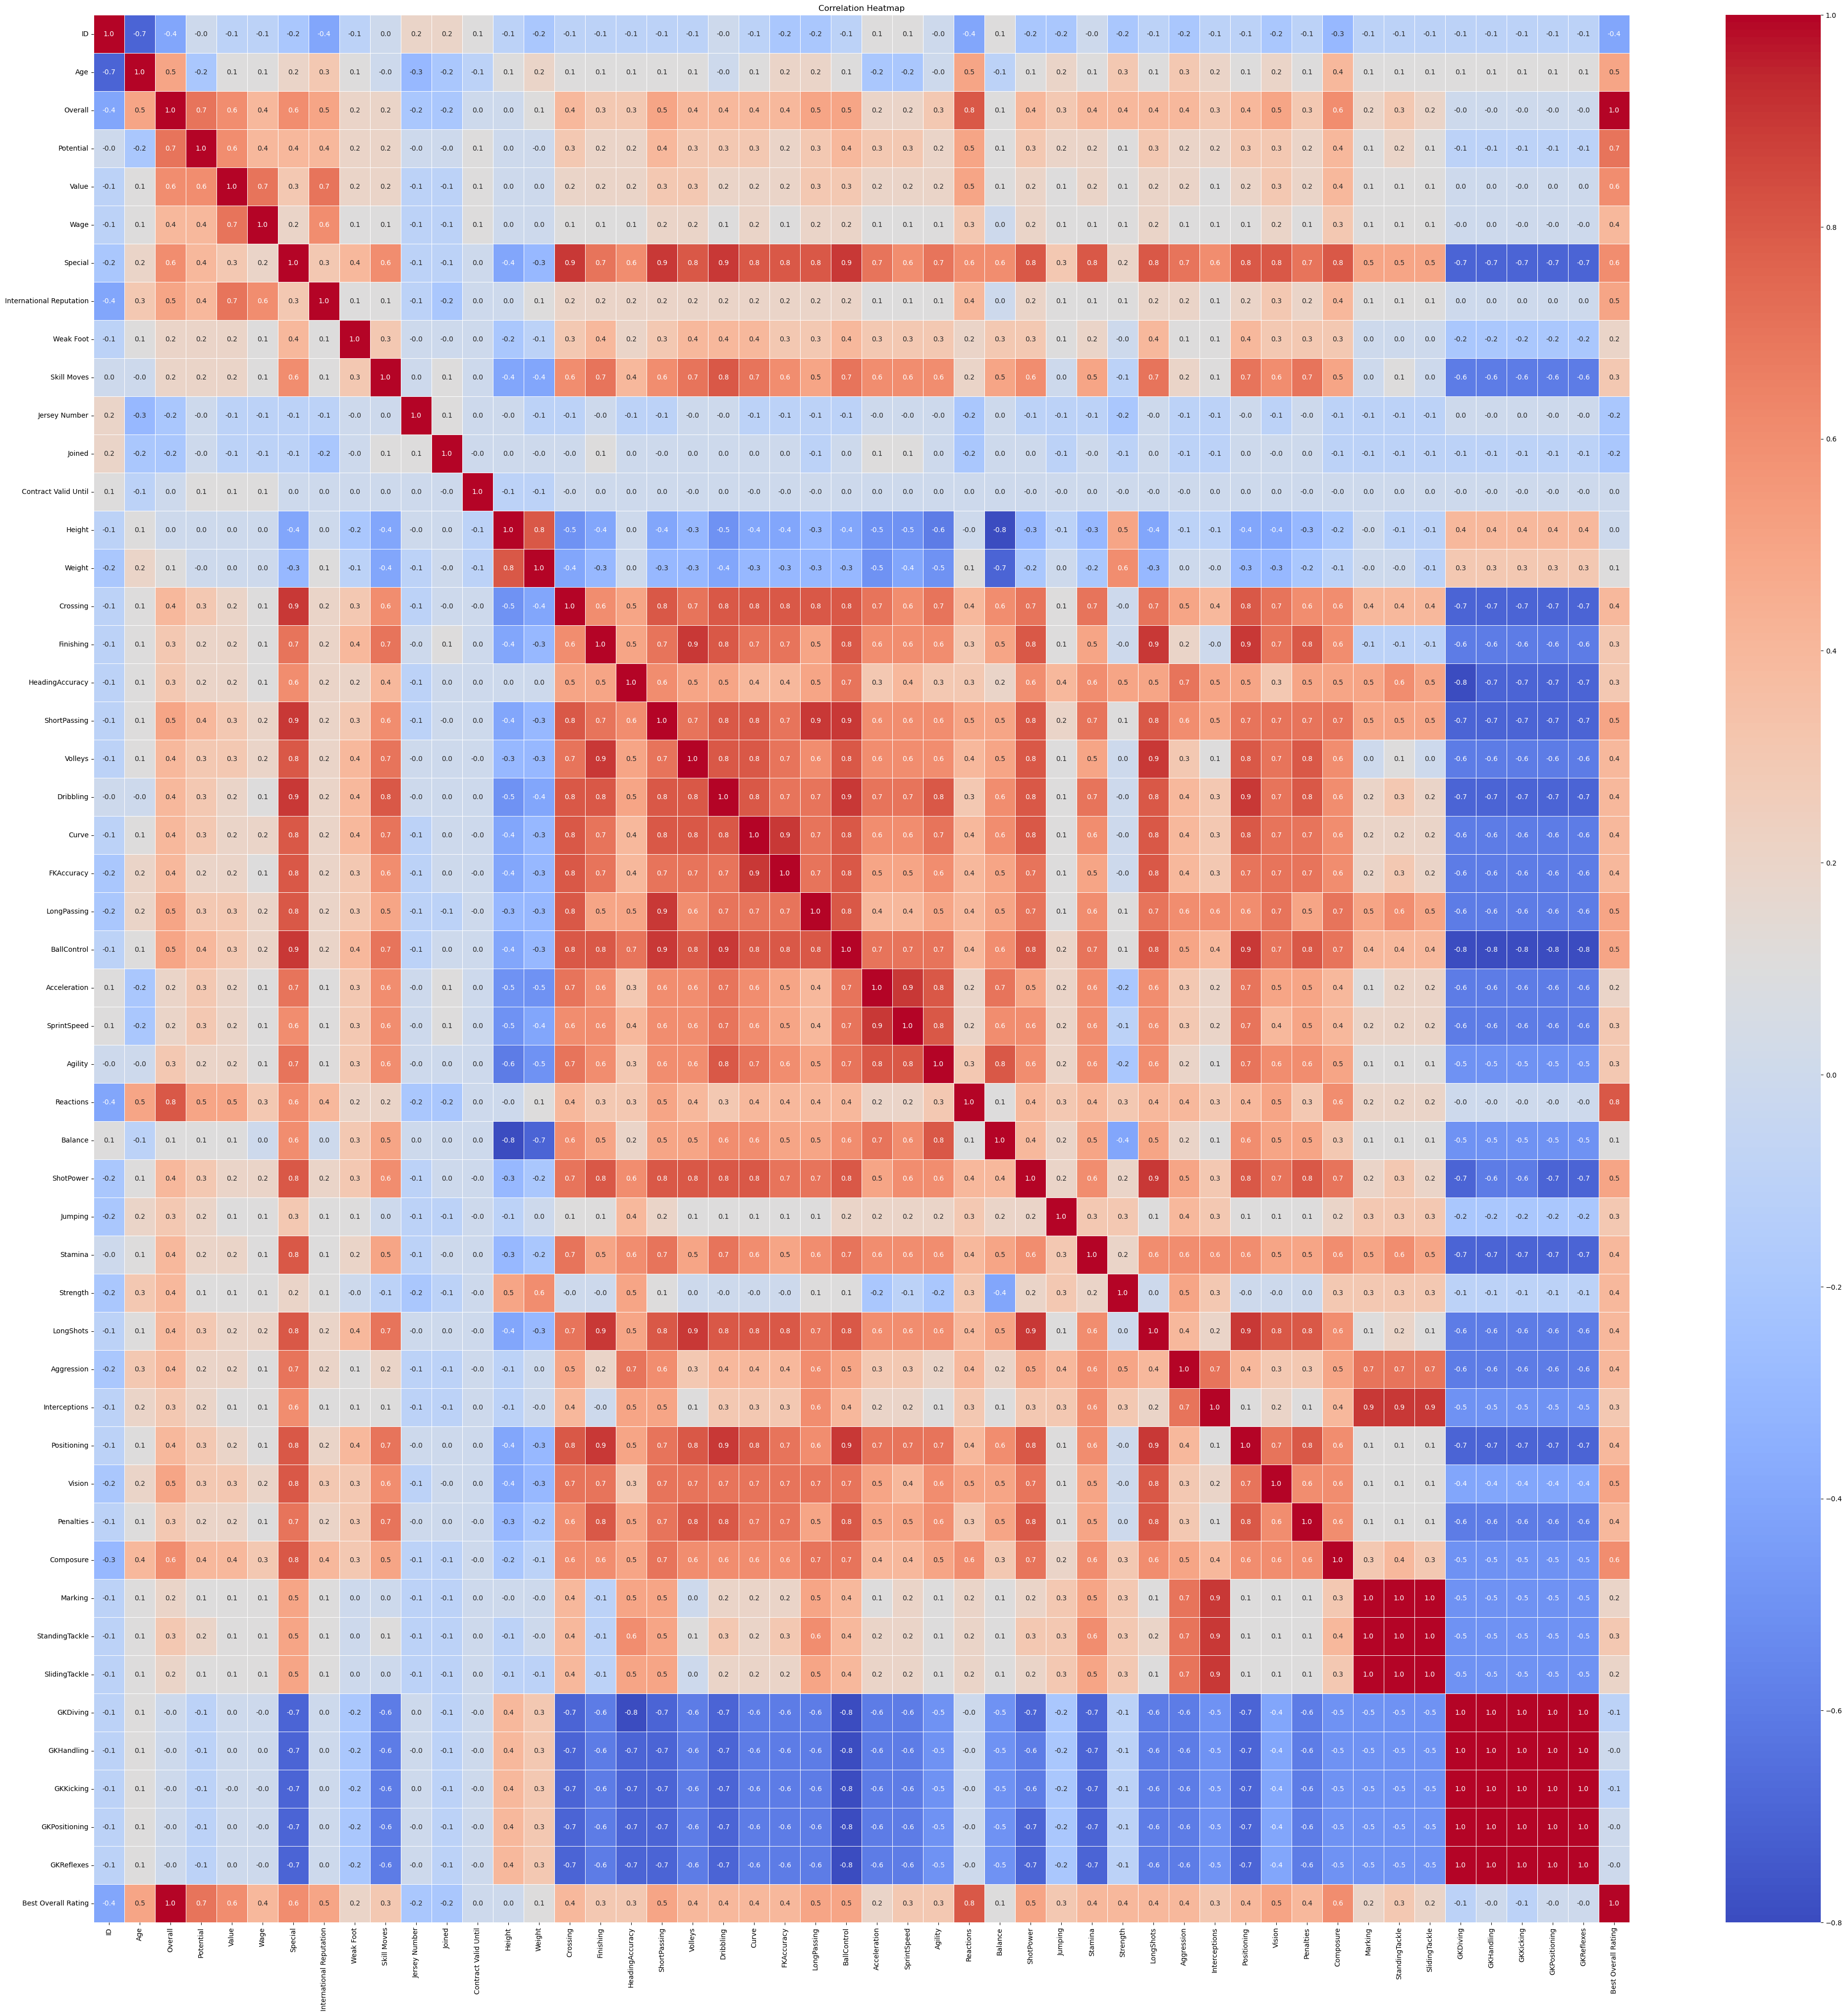

In [6408]:
def corr_matrix(num_df, display_heatmap=False, save_as_image=False, save_as_csv=False):
    corr = num_df.corr().round(1)

    if (display_heatmap==True):
        # Plot the correlation matrix heatmap
        num_features = len(num_df.columns)
        plt.figure(figsize=(num_features, num_features))
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='0.1f', linewidth=0.5)
        if(save_as_image==True):
            plt.savefig(f'correlation_heatmap_{num_features}.png', dpi=300, bbox_inches='tight')
        plt.title("Correlation Heatmap")
        plt.show()

    # Export the correlation matrix to csv
    if save_as_csv==True:
        corr.to_csv(f"corr({num_features}).csv")
    return corr

corr = corr_matrix(num_df, True)

In [6409]:
def high_corr_target_features(corr):
    # List of features highly correlated with target('Overall')
    
    high_threshold = 0.7  # Threshold
    high_corr_features = []
    
    # Iterate through the correlation matrix target column
    for row in corr.index:
        if row != 'Overall' and abs(corr.loc[row, 'Overall']) >= high_threshold:
            high_corr_features.append((row, 'Overall', corr.loc[row, 'Overall']))  # Append (row, target, correlation value)
    
    # # Remove duplicates (since correlation matrix is symmetric)
    # unique_high_corr_pairs = list(set([tuple(sorted(pair[:2])) + (pair[2],) for pair in high_corr_features]))
    
    # Display the results
    print(f"Highly correlated features with target ({len(high_corr_features)}):\n")
    for pair in high_corr_features:
        print(f"{pair[0]} ({pair[2]})")

    return high_corr_features


def mod_corr_target_features(corr):
    # List of features moderately correlated with target('Overall')

    high_threshold = 0.7
    moderate_threshold = 0.4  # Threshold
    mod_corr_features = []
    
    # Iterate through the correlation matrix target column
    for row in corr.index:
        if row != 'Overall' and abs(corr.loc[row, 'Overall']) >= moderate_threshold and abs(corr.loc[row, 'Overall']) < high_threshold:
            mod_corr_features.append((row, 'Overall', corr.loc[row, 'Overall']))  # Append (row, target, correlation value)
    
    # # Remove duplicates (since correlation matrix is symmetric)
    # unique_high_corr_pairs = list(set([tuple(sorted(pair[:2])) + (pair[2],) for pair in mod_corr_features]))
    
    print("\n------------------------------------------------------\n")
    # Display the results
    print(f"Moderately correlated features with target ({len(mod_corr_features)}):\n")
    for pair in mod_corr_features:
        print(f"{pair[0]} ({pair[2]})")

    return mod_corr_features

high_corr_features = high_corr_target_features(corr)
mod_corr_features = mod_corr_target_features(corr)

Highly correlated features with target (3):

Potential (0.7)
Reactions (0.8)
Best Overall Rating (1.0)

------------------------------------------------------

Moderately correlated features with target (22):

ID (-0.4)
Age (0.5)
Value (0.6)
Wage (0.4)
Special (0.6)
International Reputation (0.5)
Crossing (0.4)
ShortPassing (0.5)
Volleys (0.4)
Dribbling (0.4)
Curve (0.4)
FKAccuracy (0.4)
LongPassing (0.5)
BallControl (0.5)
ShotPower (0.4)
Stamina (0.4)
Strength (0.4)
LongShots (0.4)
Aggression (0.4)
Positioning (0.4)
Vision (0.5)
Composure (0.6)


In [6410]:
# Extract only the column names from the lists
columns_with_considerable_corr = [feature[0] for feature in high_corr_features + mod_corr_features]

# Iterate through all columns and print those not in the list of columns to drop
print(f"Remainging number of columns: {df.shape[1]-len(columns_with_considerable_corr)}")
for col in df.columns:
    if col not in columns_with_considerable_corr:
        print(col)

Remainging number of columns: 38
Name
Photo
Nationality
Flag
Overall
Club
Club Logo
Preferred Foot
Weak Foot
Skill Moves
Work Rate
Body Type
Real Face
Position
Jersey Number
Joined
Loaned From
Contract Valid Until
Height
Weight
Finishing
HeadingAccuracy
Acceleration
SprintSpeed
Agility
Balance
Jumping
Interceptions
Penalties
Marking
StandingTackle
SlidingTackle
GKDiving
GKHandling
GKKicking
GKPositioning
GKReflexes
Best Position


In [6411]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

# # Function to calculate VIF
# def calculate_vif(df):
#     """
#     Calculate Variance Inflation Factor (VIF) for each feature in the dataframe.
#     Args:
#     df (pd.DataFrame): DataFrame containing numerical features.
    
#     Returns:
#     pd.DataFrame: DataFrame with features and their respective VIF values.
#     """
#     # Add a constant column for intercept calculation
#     df_with_const = add_constant(df)

#     # Calculate VIF for each feature
#     vif_data = pd.DataFrame()
#     vif_data['Feature'] = df.columns
#     vif_data['VIF'] = [variance_inflation_factor(df_with_const.values, i + 1) 
#                        for i in range(len(df.columns))]

#     return vif_data

# # Example usage
# vif_result = calculate_vif(num_df.drop(['Overall'],axis=1))
# print(vif_result)

In [6412]:
def high_multicollinearity_features(corr):
    # List of features with possible severe multicollinearity
    threshold = 0.8  # Define the correlation threshold
    high_corr_pairs = []
    
    feat_corr = corr.drop(['Overall'],axis=1).drop(['Overall'], axis=0)
    
    # Iterate through the correlation matrix
    for col in feat_corr.columns:
        for row in feat_corr.index:
            if col != row and abs(feat_corr.loc[row, col]) > threshold:  # Avoid self-correlation
                high_corr_pairs.append((row, col, feat_corr.loc[row, col]))  # Append (row, col, correlation value)
    
    # Remove duplicates (since correlation matrix is symmetric)
    unique_high_corr_pairs = list(set([tuple(sorted(pair[:2])) + (pair[2],) for pair in high_corr_pairs]))
    
    # Display the results
    for pair in sorted(unique_high_corr_pairs):
        print(f"{pair[0]} ({corr.loc[pair[0],'Overall']}) & {pair[1]} ({corr.loc[pair[1],'Overall']}) - Correlation: {pair[2]}")

    if (len(unique_high_corr_pairs)==0):
        print("Wonderful! There seems to be no features with high multicollinearity (i.e correlation>0.8).")

high_multicollinearity_features(corr)

Acceleration (0.2) & SprintSpeed (0.2) - Correlation: 0.9
BallControl (0.5) & Dribbling (0.4) - Correlation: 0.9
BallControl (0.5) & Positioning (0.4) - Correlation: 0.9
BallControl (0.5) & ShortPassing (0.5) - Correlation: 0.9
BallControl (0.5) & Special (0.6) - Correlation: 0.9
Crossing (0.4) & Special (0.6) - Correlation: 0.9
Curve (0.4) & FKAccuracy (0.4) - Correlation: 0.9
Dribbling (0.4) & Positioning (0.4) - Correlation: 0.9
Dribbling (0.4) & Special (0.6) - Correlation: 0.9
Finishing (0.3) & LongShots (0.4) - Correlation: 0.9
Finishing (0.3) & Positioning (0.4) - Correlation: 0.9
Finishing (0.3) & Volleys (0.4) - Correlation: 0.9
GKDiving (-0.0) & GKHandling (-0.0) - Correlation: 1.0
GKDiving (-0.0) & GKKicking (-0.0) - Correlation: 1.0
GKDiving (-0.0) & GKPositioning (-0.0) - Correlation: 1.0
GKDiving (-0.0) & GKReflexes (-0.0) - Correlation: 1.0
GKHandling (-0.0) & GKKicking (-0.0) - Correlation: 1.0
GKHandling (-0.0) & GKPositioning (-0.0) - Correlation: 1.0
GKHandling (-0.0

In [6413]:
# Dropping 26 columns
cols_to_drop = ['ID', 'Special', 'Jersey Number', 'Joined', 'Contract Valid Until', 'Volleys', 'Curve', 'BallControl','LongPassing',
                'FKAccuracy', 'Balance', 'LongShots', 'Penalties', 'SlidingTackle', 'Wage', 'Aggression','Positioning', 'Best Position',
                'Weak Foot','Skill Moves','Height','Weight', 'Acceleration','SprintSpeed', 'Marking', 'Dribbling','StandingTackle',
                'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Best Overall Rating', 
                'Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Real Face', 'Loaned From']


# Iterate through all columns and print those not in the list of columns to drop
print(f"Remainging number of columns: {df.shape[1]-len(cols_to_drop)}")
for col in df.columns:
    if col not in cols_to_drop and col in num_col:
        print(f"{col} ({abs(corr.loc['Overall',col])})")
    elif col not in cols_to_drop:
        print(col)

Remainging number of columns: 22
Age (0.5)
Overall (1.0)
Potential (0.7)
Value (0.6)
Preferred Foot
International Reputation (0.5)
Work Rate
Body Type
Position
Crossing (0.4)
Finishing (0.3)
HeadingAccuracy (0.3)
ShortPassing (0.5)
Agility (0.3)
Reactions (0.8)
ShotPower (0.4)
Jumping (0.3)
Stamina (0.4)
Strength (0.4)
Interceptions (0.3)
Vision (0.5)
Composure (0.6)


#### Feature Selection Based on multi-collinearity and irrelevant columns

Columns to drop (27):

- **ID**: Does not add any predictive value.
- **Best Overall Rating**: has a correlation of 1 with target variable
- **Acceleration**: It is value that tracks the ability to move fast for short distances, whereas 'Sprint' give the players ability to moved fast over long distance and is more prominent for a player.
- **Positioning, Dribbling, ShortPassing, LongPassing**: Positioning focuses on the players ability to position themselves on the field, while dribbling focuses on movement while controlling the ball. However, 'BallControl' gives a better idea about the player's actual skill and overall control of the ball in different situations. Also, 'BallControl' has higher correlation with target variable.
- **Crossing**: Although Crossing is a direct attribute affecting gameplay, it's correlation with the target is low.
- **Special**: Although this feature has a high correlation with the target, because it is a derived feature it is less informative.
- **Curve**: FKAccuracy is more relevant than the players ability to curve the ball in the air
- **LongShots, Volleys**: These are not as important for goal scoring as 'Finishing'
- **GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes**: These are goalkeeper-specific attributes and they have 0 correlation with the target. 
- **Marking, StandingTackle, SlidingTackle**: Interceptions are broader. Also, 'Interceptions' has higher correlation with target variable.
- **Name, Photo, Nationality, Flag, Club, Club Logo, Real Face, Loaned From**: Does not add any predictive value.

In [6414]:
df = df.drop(columns=cols_to_drop, axis=1)
num_df, num_col, cat_df, cat_col = split_data(df)

Numerical Columns ( 18 ): 
 ['Age', 'Overall', 'Potential', 'Value', 'International Reputation', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Agility', 'Reactions', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'Interceptions', 'Vision', 'Composure']
Catgeorical Columns( 4 ): 
 ['Preferred Foot', 'Work Rate', 'Body Type', 'Position']


In [6415]:
print(f"Total Number of columns: {df.shape[1]}")
print(f"Number of numerical columns: {num_df.shape[1]}")
print(f"Number of categorical columns: {cat_df.shape[1]}")

Total Number of columns: 22
Number of numerical columns: 18
Number of categorical columns: 4


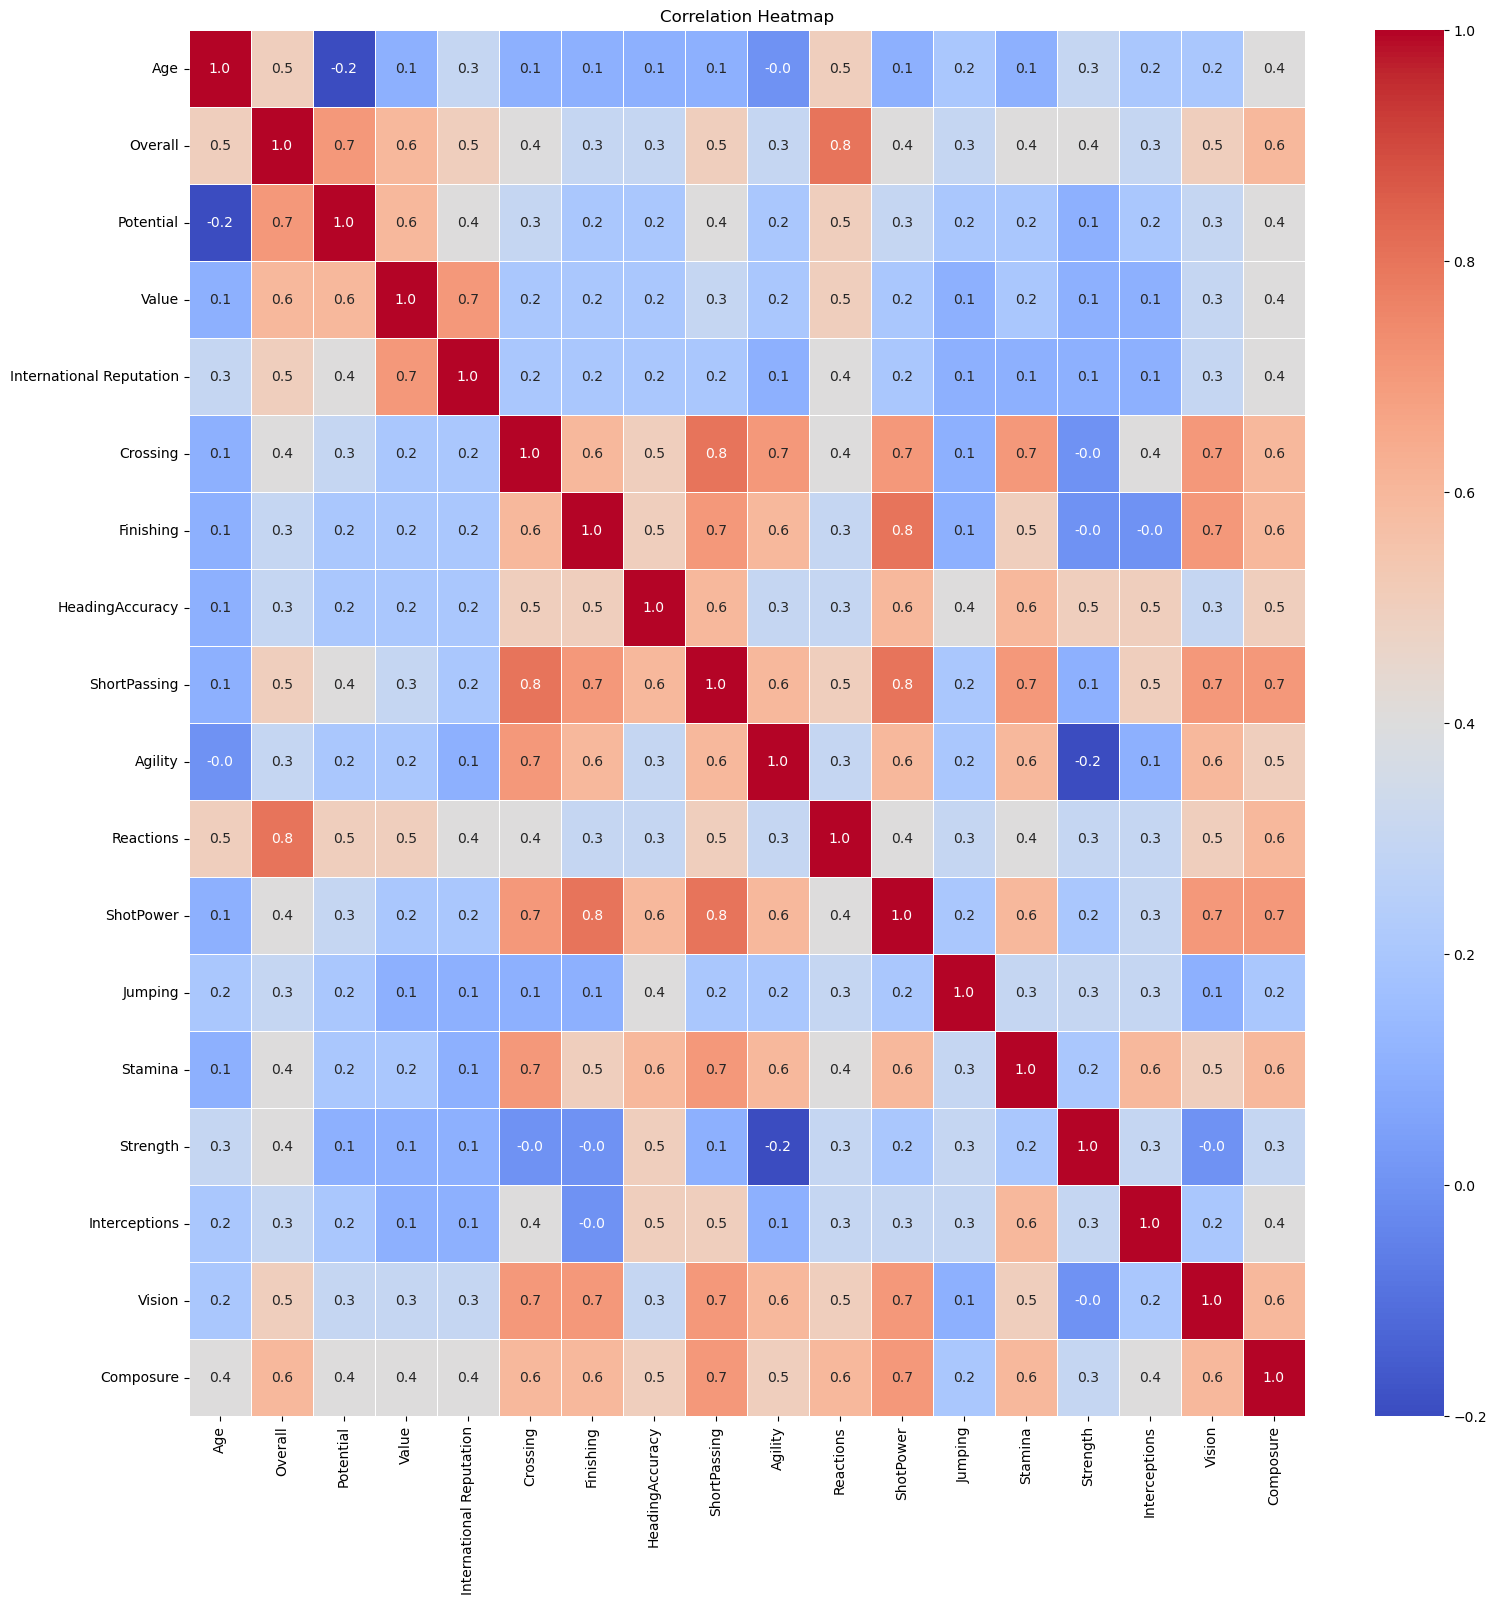

Highly correlated features with target (2):

Potential (0.7)
Reactions (0.8)

------------------------------------------------------

Moderately correlated features with target (10):

Age (0.5)
Value (0.6)
International Reputation (0.5)
Crossing (0.4)
ShortPassing (0.5)
ShotPower (0.4)
Stamina (0.4)
Strength (0.4)
Vision (0.5)
Composure (0.6)

------------------------------------------------------

Remainging number of columns: 10
Overall (1.0)
Preferred Foot
Work Rate
Body Type
Position
Finishing (0.3)
HeadingAccuracy (0.3)
Agility (0.3)
Jumping (0.3)
Interceptions (0.3)


In [6416]:
corr = corr_matrix(num_df,True)

# List of features highly correlated with target('Overall')
high_corr_features = high_corr_target_features(corr)


# List of features moderately correlated with target('Overall')
mod_corr_features = mod_corr_target_features(corr)

print("\n------------------------------------------------------\n")
# Extract only the column names from the lists
columns_with_considerable_corr = [feature[0] for feature in high_corr_features + mod_corr_features]

# Iterate through all columns and print those not in the list of columns to drop
print(f"Remainging number of columns: {df.shape[1]-len(columns_with_considerable_corr)}")
for col in df.columns:
    if col not in columns_with_considerable_corr and col in num_col:
        print(f"{col} ({abs(corr.loc['Overall',col])})")
    elif col not in columns_with_considerable_corr:
        print(col)

In [6417]:
high_multicollinearity_features(corr)

Wonderful! There seems to be no features with high multicollinearity (i.e correlation>0.8).


### Outlier Detection

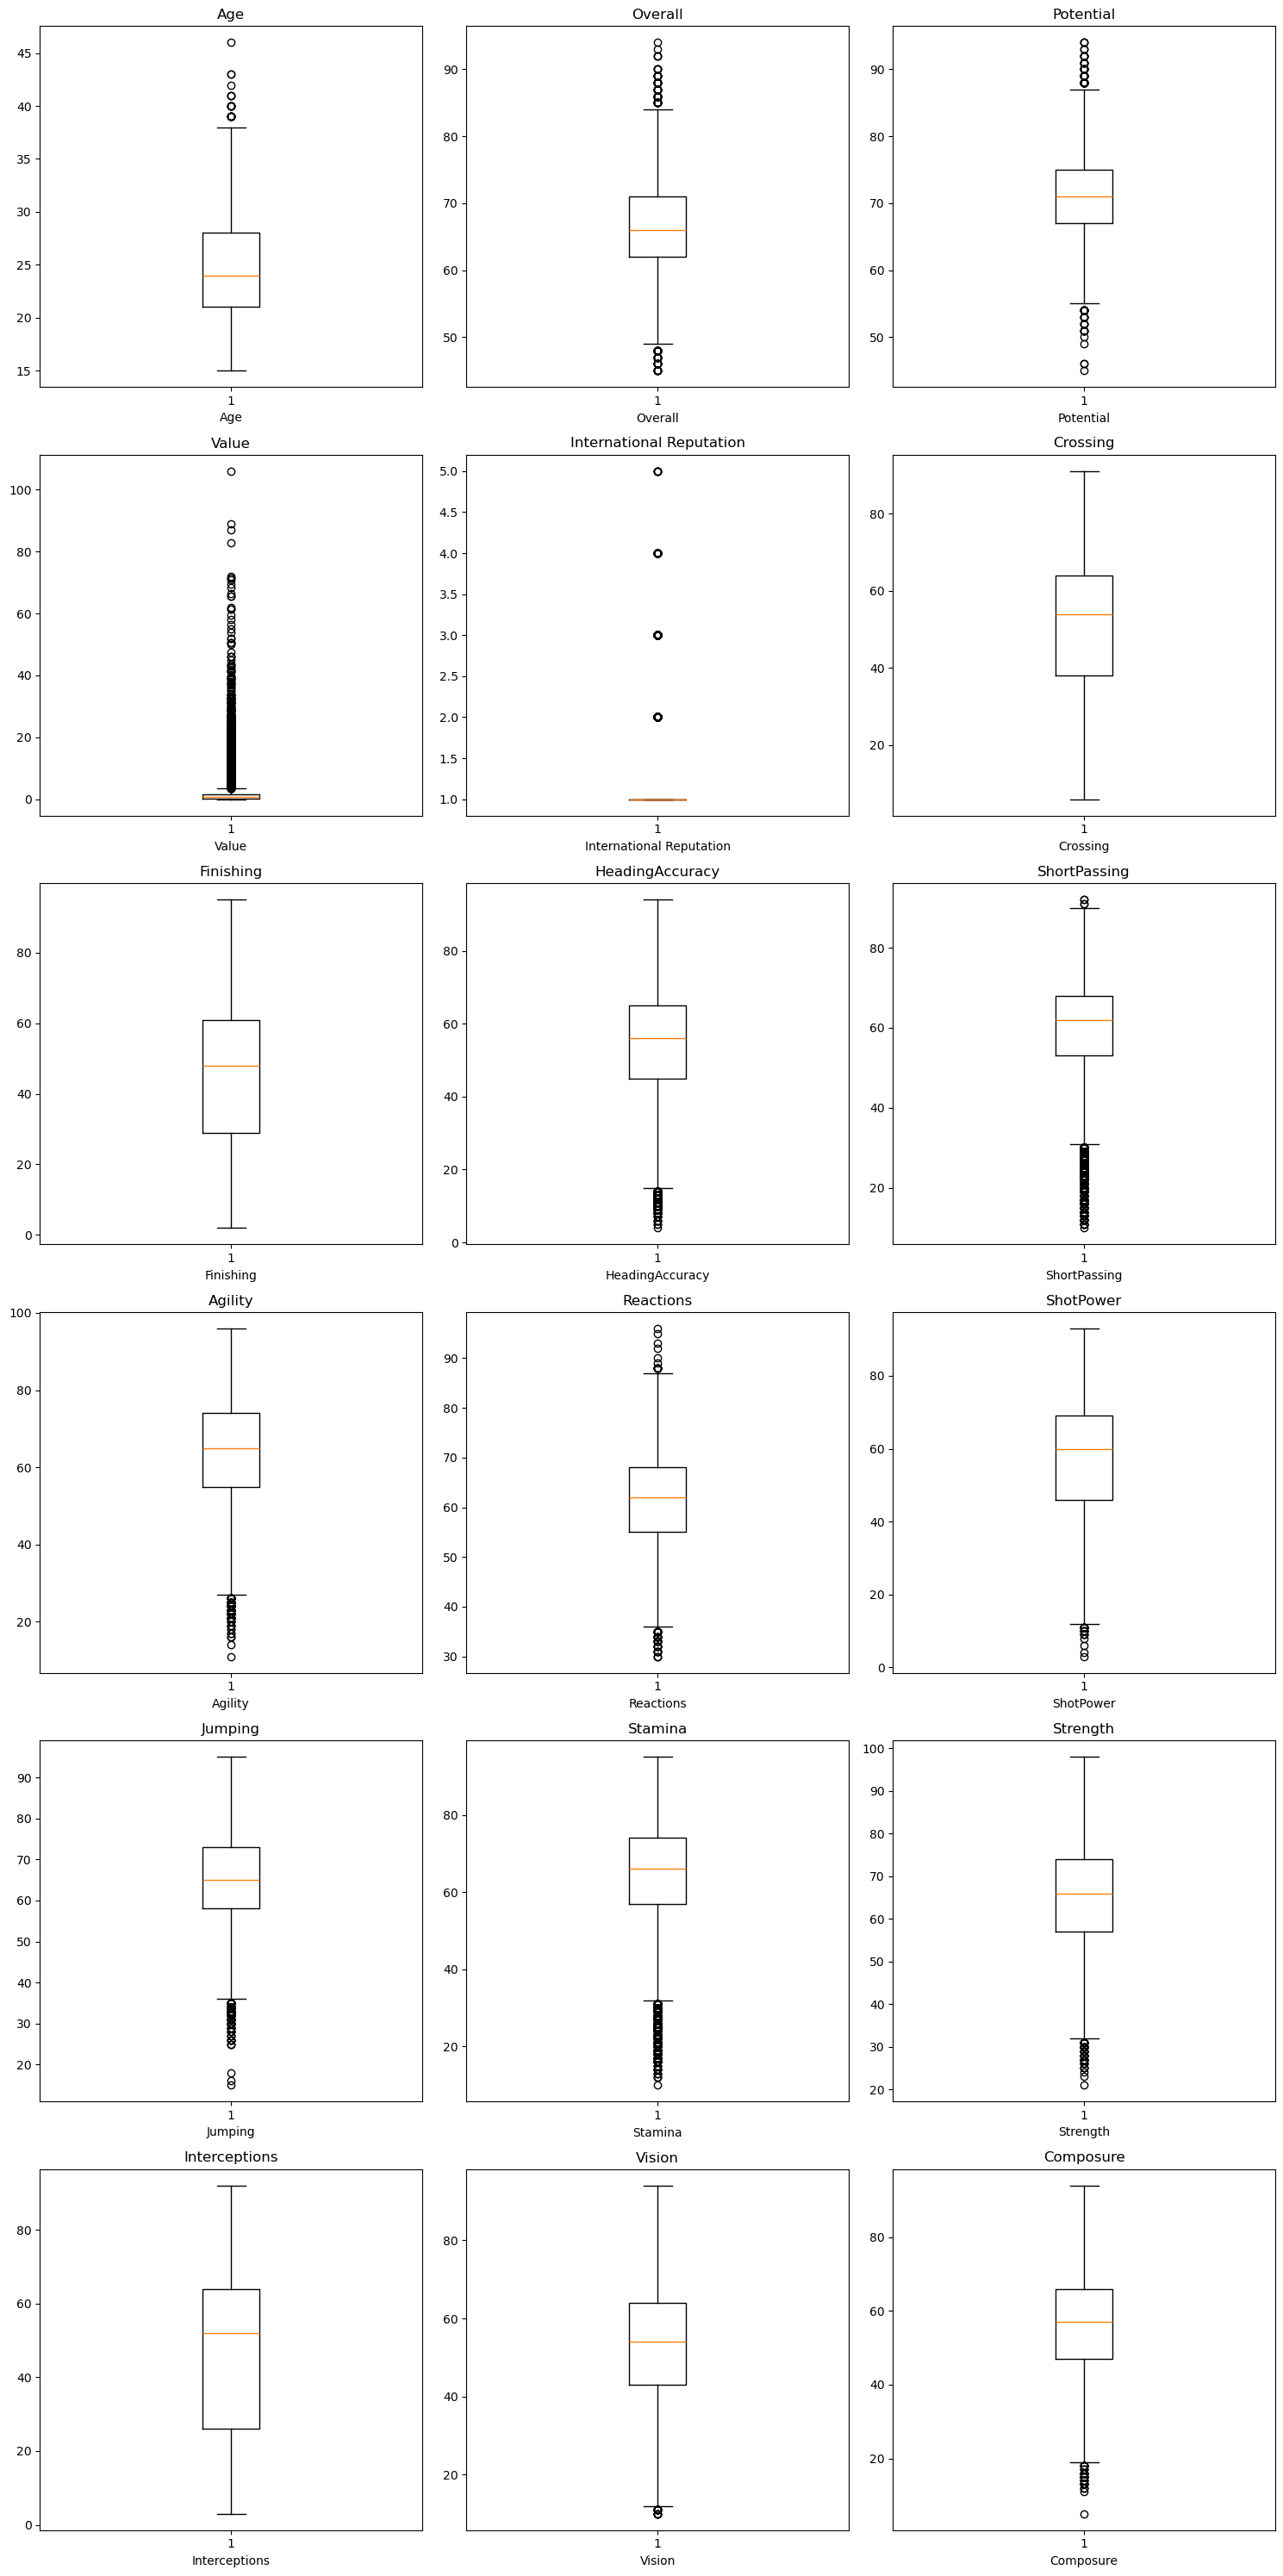

In [6418]:
# Define the number of columns and rows for the subplots
n_cols = 3  # Number of subplots per row
n_rows = math.ceil(len(num_col) / n_cols)  # Calculate required number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array to easily iterate (even if multiple rows)
axes = axes.flatten()

# Plot boxplots for each column
for i, col in enumerate(num_col):
    axes[i].boxplot(num_df[col])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)

# Hide any unused subplots (if the number of columns isn't a multiple of n_cols)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Feature Engineering

### Creating New Features

In [6419]:
# Create new features
# Physical attributes 
df['Physical_Score'] = (df['Stamina'] + df['Strength'] + df['Jumping'] + df['Agility']) / 4

# Technical attributes
df['Passing_Score'] = (df['Crossing'] + df['ShortPassing'] + df['Vision']) / 3

# Mental attributes
df['Mental_Score'] = (df['Composure'] + df['Interceptions'] + df['Reactions']) / 3

# Shooting attributes
df['Shooting_Score'] = (df['ShotPower'] + df['Finishing'] + df['HeadingAccuracy']) / 3

#--------------------------------------------------------------------------------------------------------------------------------------------#
# Generalising positions
df['Position_Group'] = df['Position'].map({
    # Attackers
    'ST': 'Attacker', 'LF': 'Attacker', 'RS': 'Attacker', 'RF': 'Attacker', 'LS': 'Attacker', 'CF': 'Attacker', 'LW': 'Attacker', 'RW': 'Attacker',

    # Midfielders
    'CM': 'Midfielder', 'CDM': 'Midfielder', 'CAM': 'Midfielder', 'RCM': 'Midfielder', 'LCM': 'Midfielder', 'RAM': 'Midfielder', 'LAM': 'Midfielder',
    'LM': 'Midfielder', 'RM': 'Midfielder', 'LDM': 'Midfielder', 'RDM': 'Midfielder',

    # Defenders
    'CB': 'Defender', 'LCB': 'Defender', 'RCB': 'Defender', 'LB': 'Defender', 'RB': 'Defender', 'LWB': 'Defender', 'RWB': 'Defender',

    # Goalkeepers
    'GK': 'Goalkeeper',

    # Substitutes or reserves
    'SUB': 'Substitute', 'RES': 'Substitute'
})

#--------------------------------------------------------------------------------------------------------------------------------------------#
# Split Work Rate into two features
df[['Attacking_WR', 'Defensive_WR']] = df['Work Rate'].str.split('/ ', n=1, expand=True)

#--------------------------------------------------------------------------------------------------------------------------------------------#
# Display the resulting dataframe with new features
df[['Physical_Score','Passing_Score','Mental_Score','Shooting_Score','Position_Group', 
    'Attacking_WR','Defensive_WR']].head(10)

Physical_Score  Passing_Score  Mental_Score  Shooting_Score Position_Group  \
0           81.00      81.333333     72.333333       86.000000       Attacker   
1           82.25      77.666667     86.000000       73.000000       Attacker   
2           82.25      80.000000     88.000000       80.666667     Midfielder   
3           80.00      81.000000     82.666667       73.666667       Defender   
4           86.50      83.333333     79.666667       78.000000     Midfielder   
5           80.00      84.000000     77.000000       88.000000       Attacker   
6           80.25      78.000000     78.000000       76.000000     Substitute   
7           75.50      81.666667     80.333333       76.000000       Defender   
8           75.25      86.666667     80.000000       66.333333     Midfielder   
9           89.25      84.000000     70.333333       90.000000       Attacker   

  Attacking_WR Defensive_WR  
0         High       Medium  
1         High         High  
2         High         High  
3         High       Medium  
4         High       Medium  
5         High       Medium  
6         High       Medium  
7         High       Medium  
8         High       Medium  
9         High          Low

New Features (3)  
<!-- **BMI**: Derived from Height and Weight - Reflects physical build and fitness.  
**Contract Length**: Difference between Contract Valid Until and Joined - Indicates player value and stability.  
**Age Group**: Categorize players into bins (Young, Prime, Veteran) - Helps in understanding player lifecycle.  
**Total Passing Ability**: Sum of ShortPassing and LongPassing - Reflects overall passing ability.   -->
<!-- # 'BMI','Weight'] / ('Height'] ** 2)).round(2)                     # to get BMI in kg/m^2
# 'Contract_Length'] = 'Contract Valid Until'] - 'Joined']             # contract period in no. of years

# 'Total_Passing'] = 'ShortPassing','LongPassing'] 
# 'Dribbling_Control',('Dribbling','BallControl','Agility']) / 3).round(2) 
'Defensive_Score',('Interceptions','Marking']) / 2).round(2)-->
**Attacking Score**: Average of Finishing, ShotPower - Represents attacking capability.  
**Defensive Score**: Average of Interceptions, and Marking - Measures defensive skills.  
**Physical Score**: Average of Strength, Stamina, and Jumping - Reflects physicality.  
<!-- **Dribbling Control**: Averages of Dribbling, BallControl, and Agility - Measures ball-handling and agility.   -->

In [6420]:
for col in df[['Physical_Score','Passing_Score','Mental_Score','Shooting_Score', 'Position_Group','Attacking_WR','Defensive_WR']]:
    print(f"Unique values in '{col}' ({df[col].nunique()}): \n{df[col].unique()}\n")

Unique values in 'Physical_Score' (231): 
[81.   82.25 80.   86.5  80.25 75.5  75.25 89.25 72.75 81.75 73.5  76.75
 75.75 74.5  76.25 78.25 82.   76.5  72.5  79.   79.5  75.   83.   70.
 82.5  71.   74.25 81.25 74.75 77.25 77.75 74.   81.5  85.   70.25 67.25
 78.   84.25 80.75 76.   77.   70.75 65.25 71.75 71.25 73.75 80.5  77.5
 84.75 79.75 78.5  69.25 68.5  72.25 69.75 79.25 64.   73.25 67.5  70.5
 73.   68.25 84.   83.5  71.5  66.5  63.75 78.75 68.   72.   66.75 63.5
 64.25 66.25 68.75 67.75 66.   62.25 65.75 64.5  69.5  62.75 67.   69.
 62.5  56.   63.25 65.5  65.   57.5  64.75 62.   60.   61.75 58.75 61.25
 61.5  60.75 60.25 63.   82.75 60.5  54.75 83.75 59.5  54.5  57.25 57.
 58.25 61.   55.5  59.75 84.5  57.75 59.   53.75 55.75 58.   55.25 56.25
 59.25 56.75 47.75 50.75 58.5  52.75 52.   48.   53.   55.   51.75 52.25
 56.5  54.25 51.25 49.5  54.   51.5  52.5  53.5  40.75 50.25 47.   46.75
 49.75 49.   44.75 48.75 48.25 53.25 50.   46.5  51.   49.25 47.25 50.5
 48.5  42.75 45.75 

### Dropping Columns

In [6421]:
# drop redundant columns (13)
cols_to_drop = ['Position', 'Work Rate',
                'Stamina','Strength','Jumping','Agility', 
                'Crossing','ShortPassing','Vision', 
                'Composure','Interceptions','Reactions',
                'ShotPower','Finishing','HeadingAccuracy']
                        
df = df.drop(columns=cols_to_drop, axis=1)
num_df, num_col, cat_df, cat_col = split_data(df)

Numerical Columns ( 9 ): 
 ['Age', 'Overall', 'Potential', 'Value', 'International Reputation', 'Physical_Score', 'Passing_Score', 'Mental_Score', 'Shooting_Score']
Catgeorical Columns( 5 ): 
 ['Preferred Foot', 'Body Type', 'Position_Group', 'Attacking_WR', 'Defensive_WR']


Reason for dropping selected columns (16)

<!-- **ID**: *Purely a unique identifier, irrelevant for prediction.*  
**Age**:  *Created new feature*  
**Name**: *Informational only; doesn't contribute to performance prediction.*  
**Photo**: *URL to player photo; purely visual, irrelevant for prediction.*  
**Nationality**: *Descriptive only; doesn't directly influence gameplay.*  
**Flag**: *URL to flag image; purely visual, irrelevant for prediction.*  
**Club**: *Descriptive only; doesn't affect individual performance.*  
**Club Logo**: *URL to club logo; purely visual, irrelevant for prediction.*  
**Real Face**: *Indicates whether the player's face is realistically rendered; irrelevant for gameplay.*   -->
**Jersey Number**: *Purely informational; no impact on gameplay.*  
**Joined**: *Date the player joined the club; irrelevant for predicting performance.*  
<!-- **Loaned From**: *Describes loan status; irrelevant for player performance.*   -->
**Contract Valid Until**: *Contract expiry date; administrative detail, irrelevant for performance prediction.*  
**Height**: *Already reflected in Jumping and Strength.*  
**Weight**: *Already reflected in Body Type.*  
<!-- **Volleys**: *Only moderate correlation (0.4) with Overall and minimal contribution to overall performance.*  
**Curve**: *Only moderate correlation (0.4) with Overall and less important compared to Dribbling and Crossing.*  
**FKAccuracy**: *Specialized skill, only moderate correlation (0.4) with Overall.*   -->
**Penalties**: *Situational skill, only moderate correlation (0.3) with Overall.*  
**Finishing + ShotPower**: *Created new feature*  
**StandingTackle + Interceptions + Marking**: *Created new feature*  
**Strength + Stamina + Jumping**: *Created new feature*  
<!-- **Dribbling + BallControl + Agility**: *Created new feature*   -->
<!-- **GKDiving**: *Goalkeeper-specific skill; to be used separately for goalkeeper model.*  
**GKHandling**: *Goalkeeper-specific skill; to be used separately for goalkeeper model.*  
**GKKicking**: *Goalkeeper-specific skill; to be used separately for goalkeeper model.*  
**GKPositioning**: *Goalkeeper-specific skill; to be used separately for goalkeeper model.*  
**GKReflexes**: *Goalkeeper-specific skill; to be used separately for goalkeeper model.* -->

Reason for keeping selected columns (33)

**Overall (Target Value)**: *The player's overall rating based on various attributes.*  
**Potential**: *The player's potential rating, which indicates their peak performance.*  
**Value**: *The player's estimated market value.*  
**Wage**: *The player's weekly wage.*  
**Special**: *A special rating based on how unique or outstanding the player's skills are.*  
**Preferred Foot**: *Whether the player prefers their left or right foot.*  
**International Reputation**: *A score indicating the player's international reputation (higher means more well-known globally).*  
**Weak Foot**: *The player's skill level with their non-dominant foot.*  
**Skill Moves**: *The player's proficiency with skill moves (rated out of 5 stars).*  
**Work Rate**: *The player's work rate in both attack and defense (e.g., “High/Medium”).*  
**Body Type**: *The player's physical build (e.g., lean, normal, stocky).*  
**Position**: *The player's primary playing position (e.g., ST, CM).*  
**Crossing**: *The player's ability to deliver accurate crosses.*  
**HeadingAccuracy**: *The player's accuracy with headers.*  
**Acceleration**: *How quickly the player can reach top speed.*  
**SprintSpeed**: *The player's top running speed.*  
**Agility**: *How quickly the player can change direction.*  
**Reactions**: *The player's reaction time to in-game events.*  
**Balance**: *The player's ability to maintain balance, especially in duels or when dribbling.*  
**Aggression**: *The player's intensity in challenging for the ball.*  
**Positioning**: *The player's ability to position themselves well on the field.*  
**Vision**: *The player's awareness of their teammates' positions.*  
**Composure**: *The player's ability to remain calm under pressure.*  
**Best Position**: *The player's best-suited position on the field.*  
**Best Overall Rating**: *The player's highest rating based on different positions.*  
**BMI**: *Derived from Height and Weight*  
**Contract Length**: *Difference between Contract Valid Until and Joined*  
**Age Group**: *Categorize players into bins (Young, Prime, Veteran)*  
**Total Passing Ability**: *Sum of ShortPassing and LongPassing*  
**Attacking Score**: *Average of Finishing, ShotPower, and LongShots*   
**Defensive Score**: *Average of StandingTackle, SlidingTackle, Interceptions, and Marking*   
**Physical Score**: *Average of Strength, Stamina, and Jumping - Reflects physicality.*  
**Dribbling Control**: *Averages of Dribbling, BallControl, and Agility.*  

#### Duplicate Values

##### Rows

In [6422]:
df.duplicated().sum()

0

##### Columns

In [6423]:
df.columns.duplicated().sum()

0

### Unique values in categorical columns

In [6424]:
for col in cat_col:
    print(f"Unique values in '{col}' ({df[col].nunique()}): \n{df[col].unique()}\n")

Unique values in 'Preferred Foot' (2): 
['Right' 'Left']

Unique values in 'Body Type' (16): 
['Normal (170-185)' 'Stocky (170-185)' 'Lean (170-185)' 'Lean (185+)'
 'Normal (170-)' 'C. Ronaldo' 'Normal (185+)' 'Messi' 'Stocky (170-)'
 'Lean (170-)' 'Shaqiri' 'Neymar' 'Normal (190+)' 'Stocky (185+)'
 'Courtois' 'Akinfenwa']

Unique values in 'Position_Group' (5): 
['Attacker' 'Midfielder' 'Defender' 'Substitute' 'Goalkeeper']

Unique values in 'Attacking_WR' (3): 
['High' 'Medium' 'Low']

Unique values in 'Defensive_WR' (3): 
['Medium' 'High' 'Low']



**There are some incorrect values in 'Body Type' column**

In [6425]:
# List of known incorrect values
incorrect_values = ['C. Ronaldo', 'Messi', 'Shaqiri', 'Neymar', 'Courtois', 'Akinfenwa']

# Filter and display rows with incorrect values in the 'Body Type' column
incorrect_records = df[df['Body Type'].isin(incorrect_values)]
incorrect_records

Age  Overall  Potential   Value Preferred Foot  \
9       31       94         94   87.00          Right   
58      29       93         93   89.00           Left   
120     24       82         85   25.00           Left   
168     24       92         94  106.00          Right   
15266   24       89         92   65.50           Left   
10997   34       64         64    0.23          Right   

       International Reputation   Body Type  Physical_Score  Passing_Score  \
9                           5.0  C. Ronaldo           89.25      84.000000   
58                          5.0       Messi           72.75      85.000000   
120                         3.0     Shaqiri           75.25      77.666667   
168                         5.0      Neymar           72.25      78.666667   
15266                       4.0    Courtois           59.25      30.000000   
10997                       1.0   Akinfenwa           60.00      52.333333   

       Mental_Score  Shooting_Score Position_Group Attacking_WR Defensive_WR  
9         70.333333       90.000000       Attacker         High          Low  
58        70.333333       83.666667       Attacker       Medium       Medium  
120       74.333333       65.000000     Midfielder         High       Medium  
168       68.000000       76.333333       Attacker         High       Medium  
15266     49.333333       21.000000     Goalkeeper       Medium       Medium  
10997     49.333333       64.333333       Attacker          Low          Low

#### Replace incorrect values with mode

In [6426]:
most_common_body_type = df['Body Type'].mode()[0]

df['Body Type'] = df['Body Type'].replace(incorrect_values, most_common_body_type)

print(f"Unique values in 'Body Type' ({df['Body Type'].nunique()}): \n{df['Body Type'].unique()}\n")

Unique values in 'Body Type' (10): 
['Normal (170-185)' 'Stocky (170-185)' 'Lean (170-185)' 'Lean (185+)'
 'Normal (170-)' 'Normal (185+)' 'Stocky (170-)' 'Lean (170-)'
 'Normal (190+)' 'Stocky (185+)']



In [6427]:
# Feature Engineering
# Split Body Type into two features
df[['Build_Type', 'Height_Range']] = df['Body Type'].str.extract(r'(\w+)\s\((.*?)\)', expand=True)

df = df.drop(columns=['Body Type'], axis=1)
num_df, num_col, cat_df, cat_col = split_data(df)

# Display the resulting dataframe with new features
df.head(10)

Numerical Columns ( 9 ): 
 ['Age', 'Overall', 'Potential', 'Value', 'International Reputation', 'Physical_Score', 'Passing_Score', 'Mental_Score', 'Shooting_Score']
Catgeorical Columns( 6 ): 
 ['Preferred Foot', 'Position_Group', 'Attacking_WR', 'Defensive_WR', 'Build_Type', 'Height_Range']


Age  Overall  Potential  Value Preferred Foot  International Reputation  \
0   29       92         92   83.0          Right                       5.0   
1   28       86         86   37.5          Right                       3.0   
2   29       87         87   41.5          Right                       4.0   
3   24       86         89   41.5           Left                       4.0   
4   23       88         94   71.5          Right                       4.0   
5   26       90         90   72.0           Left                       4.0   
6   25       82         85   20.5          Right                       3.0   
7   31       83         83   14.5           Left                       3.0   
8   30       89         89   54.0          Right                       4.0   
9   31       94         94   87.0          Right                       5.0   

   Physical_Score  Passing_Score  Mental_Score  Shooting_Score Position_Group  \
0           81.00      81.333333     72.333333       86.000000       Attacker   
1           82.25      77.666667     86.000000       73.000000       Attacker   
2           82.25      80.000000     88.000000       80.666667     Midfielder   
3           80.00      81.000000     82.666667       73.666667       Defender   
4           86.50      83.333333     79.666667       78.000000     Midfielder   
5           80.00      84.000000     77.000000       88.000000       Attacker   
6           80.25      78.000000     78.000000       76.000000     Substitute   
7           75.50      81.666667     80.333333       76.000000       Defender   
8           75.25      86.666667     80.000000       66.333333     Midfielder   
9           89.25      84.000000     70.333333       90.000000       Attacker   

  Attacking_WR Defensive_WR Build_Type Height_Range  
0         High       Medium     Normal      170-185  
1         High         High     Stocky      170-185  
2         High         High     Normal      170-185  
3         High       Medium       Lean      170-185  
4         High       Medium       Lean         185+  
5         High       Medium       Lean      170-185  
6         High       Medium       Lean      170-185  
7         High       Medium     Normal         170-  
8         High       Medium       Lean      170-185  
9         High          Low     Normal      170-185

# Exploratory Data Analysis (EDA)

### Correlation Matrix

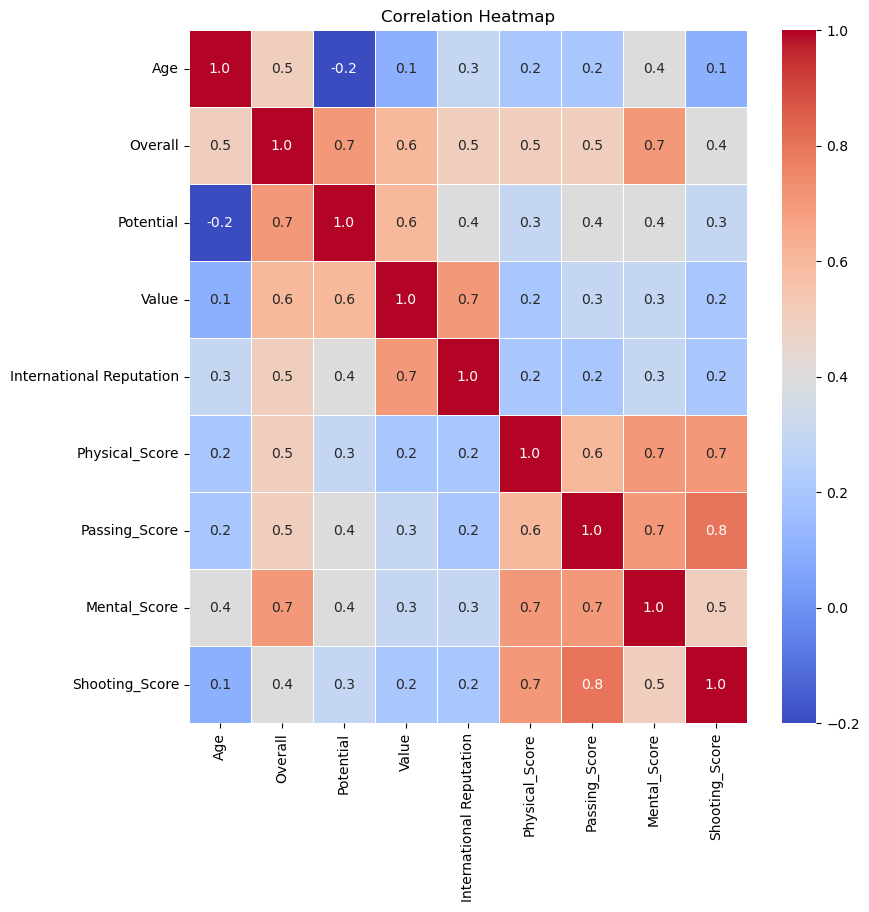

In [6428]:
corr = corr_matrix(num_df,True)

## Univariate Analysis
understanding the distribution and properties of individual variables.

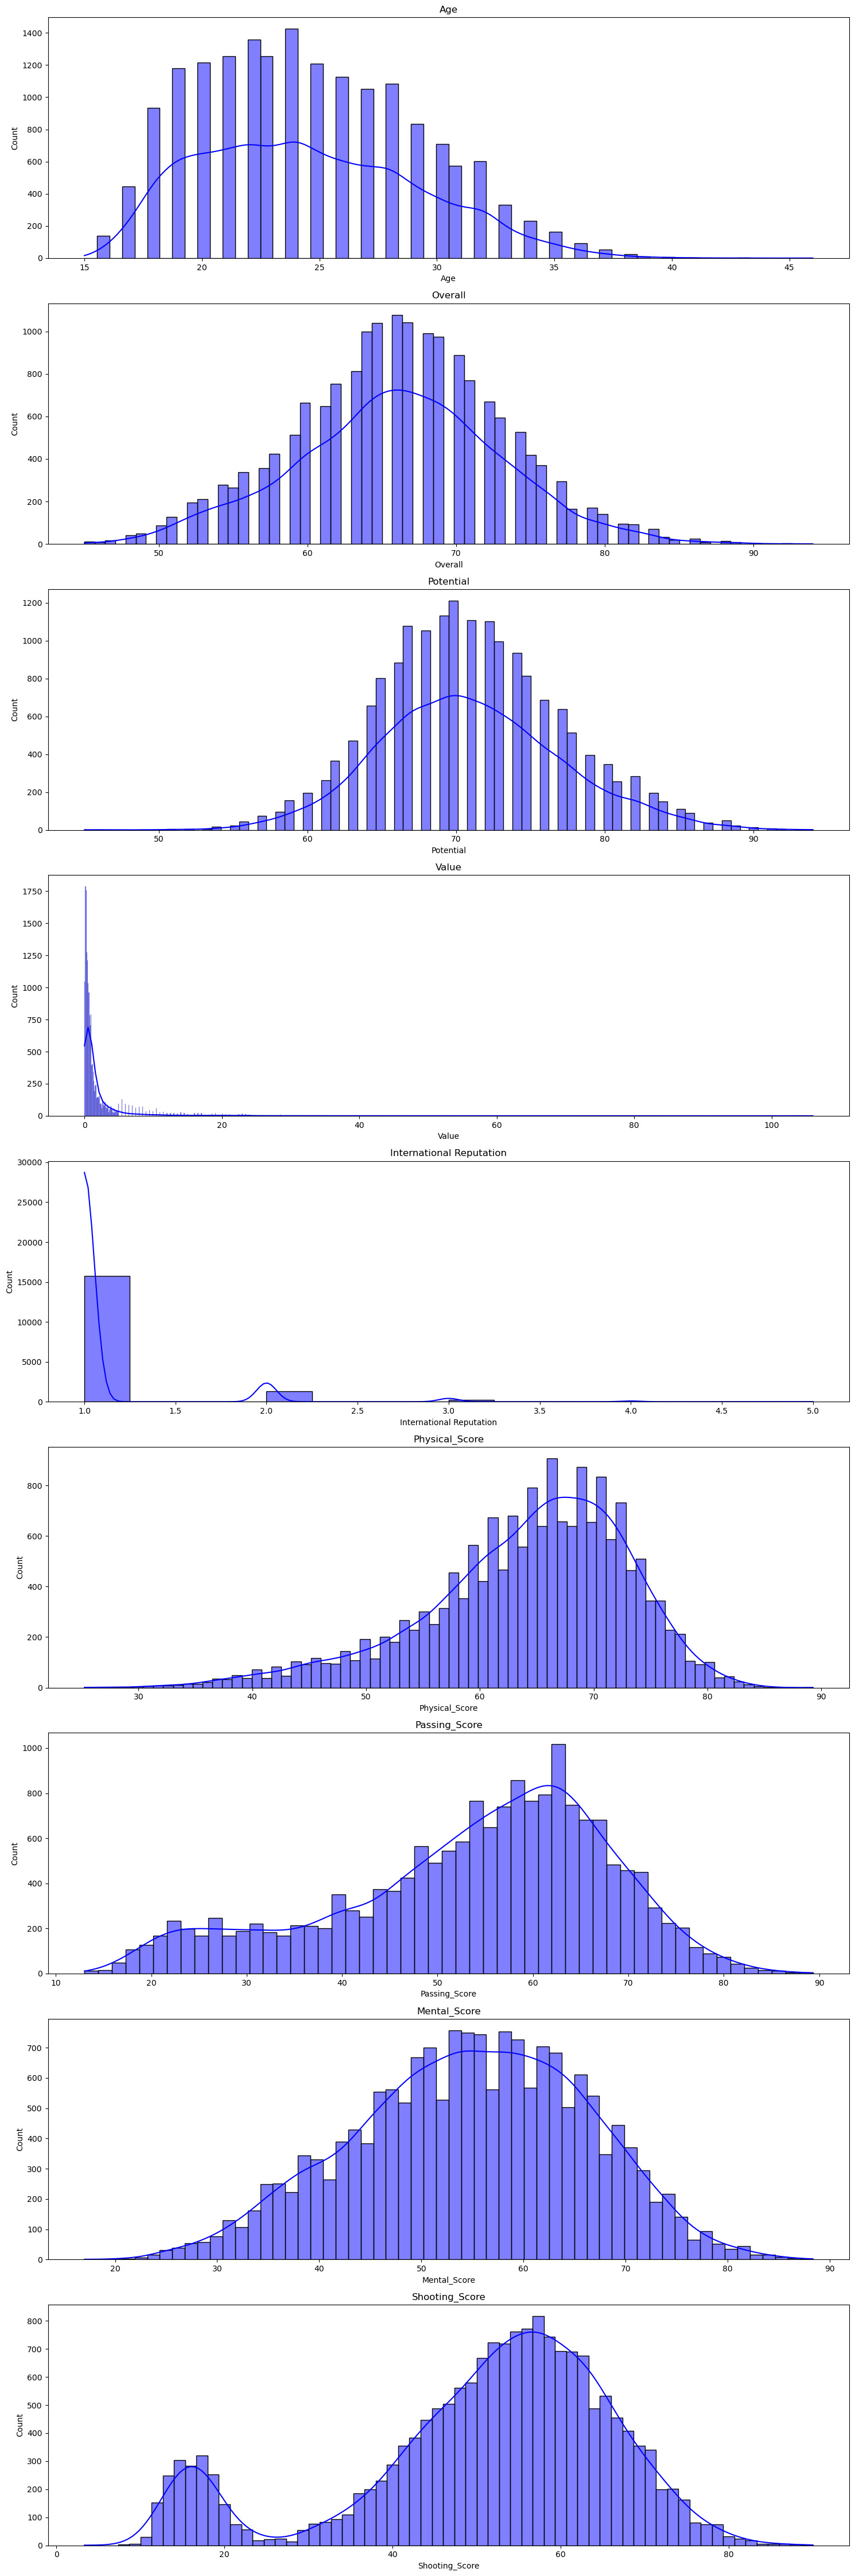

In [6429]:
# Define the number of columns and rows for the subplots
n_cols = 1  # Number of subplots per row
n_rows = math.ceil(len(num_col) / n_cols)  # Calculate required number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array to easily iterate (even if multiple rows)
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(num_col):
    sns.histplot(num_df[col], kde=True, ax=axes[i], color='blue', edgecolor='black')  # Pass the data for each column
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)

# Hide any unused subplots (if the number of columns isn't a multiple of n_cols)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## Bivariate Analysis
Relationship between an independent variable and the target variable

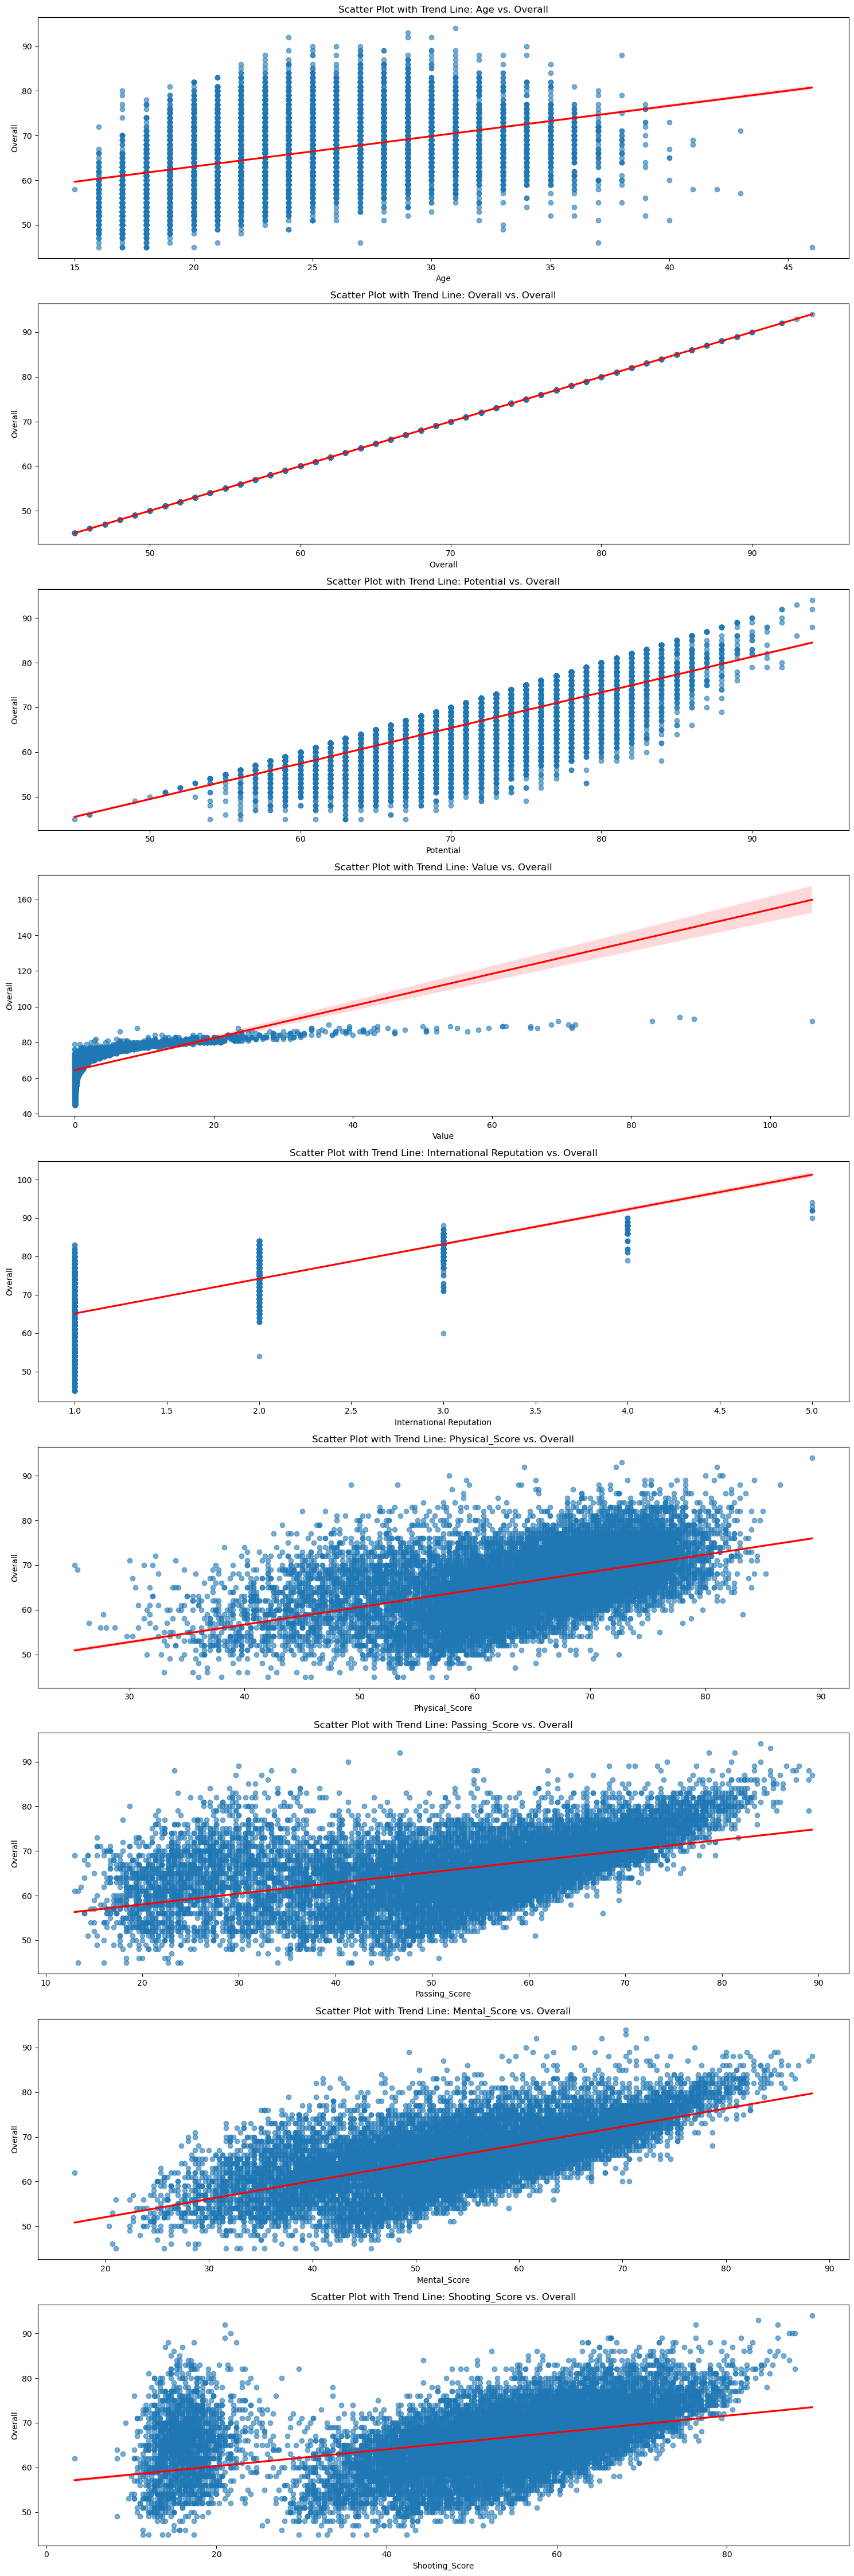

In [6430]:
# Define the number of columns and rows for the subplots
n_cols = 1  # Number of subplots per row
n_rows = math.ceil(len(num_col) / n_cols)  # Calculate required number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

# Plot scatter plots with regression lines for each numerical feature against 'Overall'
for i, col in enumerate(num_col):
    sns.regplot(x=num_df[col], y=df['Overall'], ax=axes[i], scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
    axes[i].set_title(f"Scatter Plot with Trend Line: {col} vs. Overall")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Overall')

# Hide any unused subplots (if the number of columns isn't a multiple of n_cols)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## Multivariate Analysis

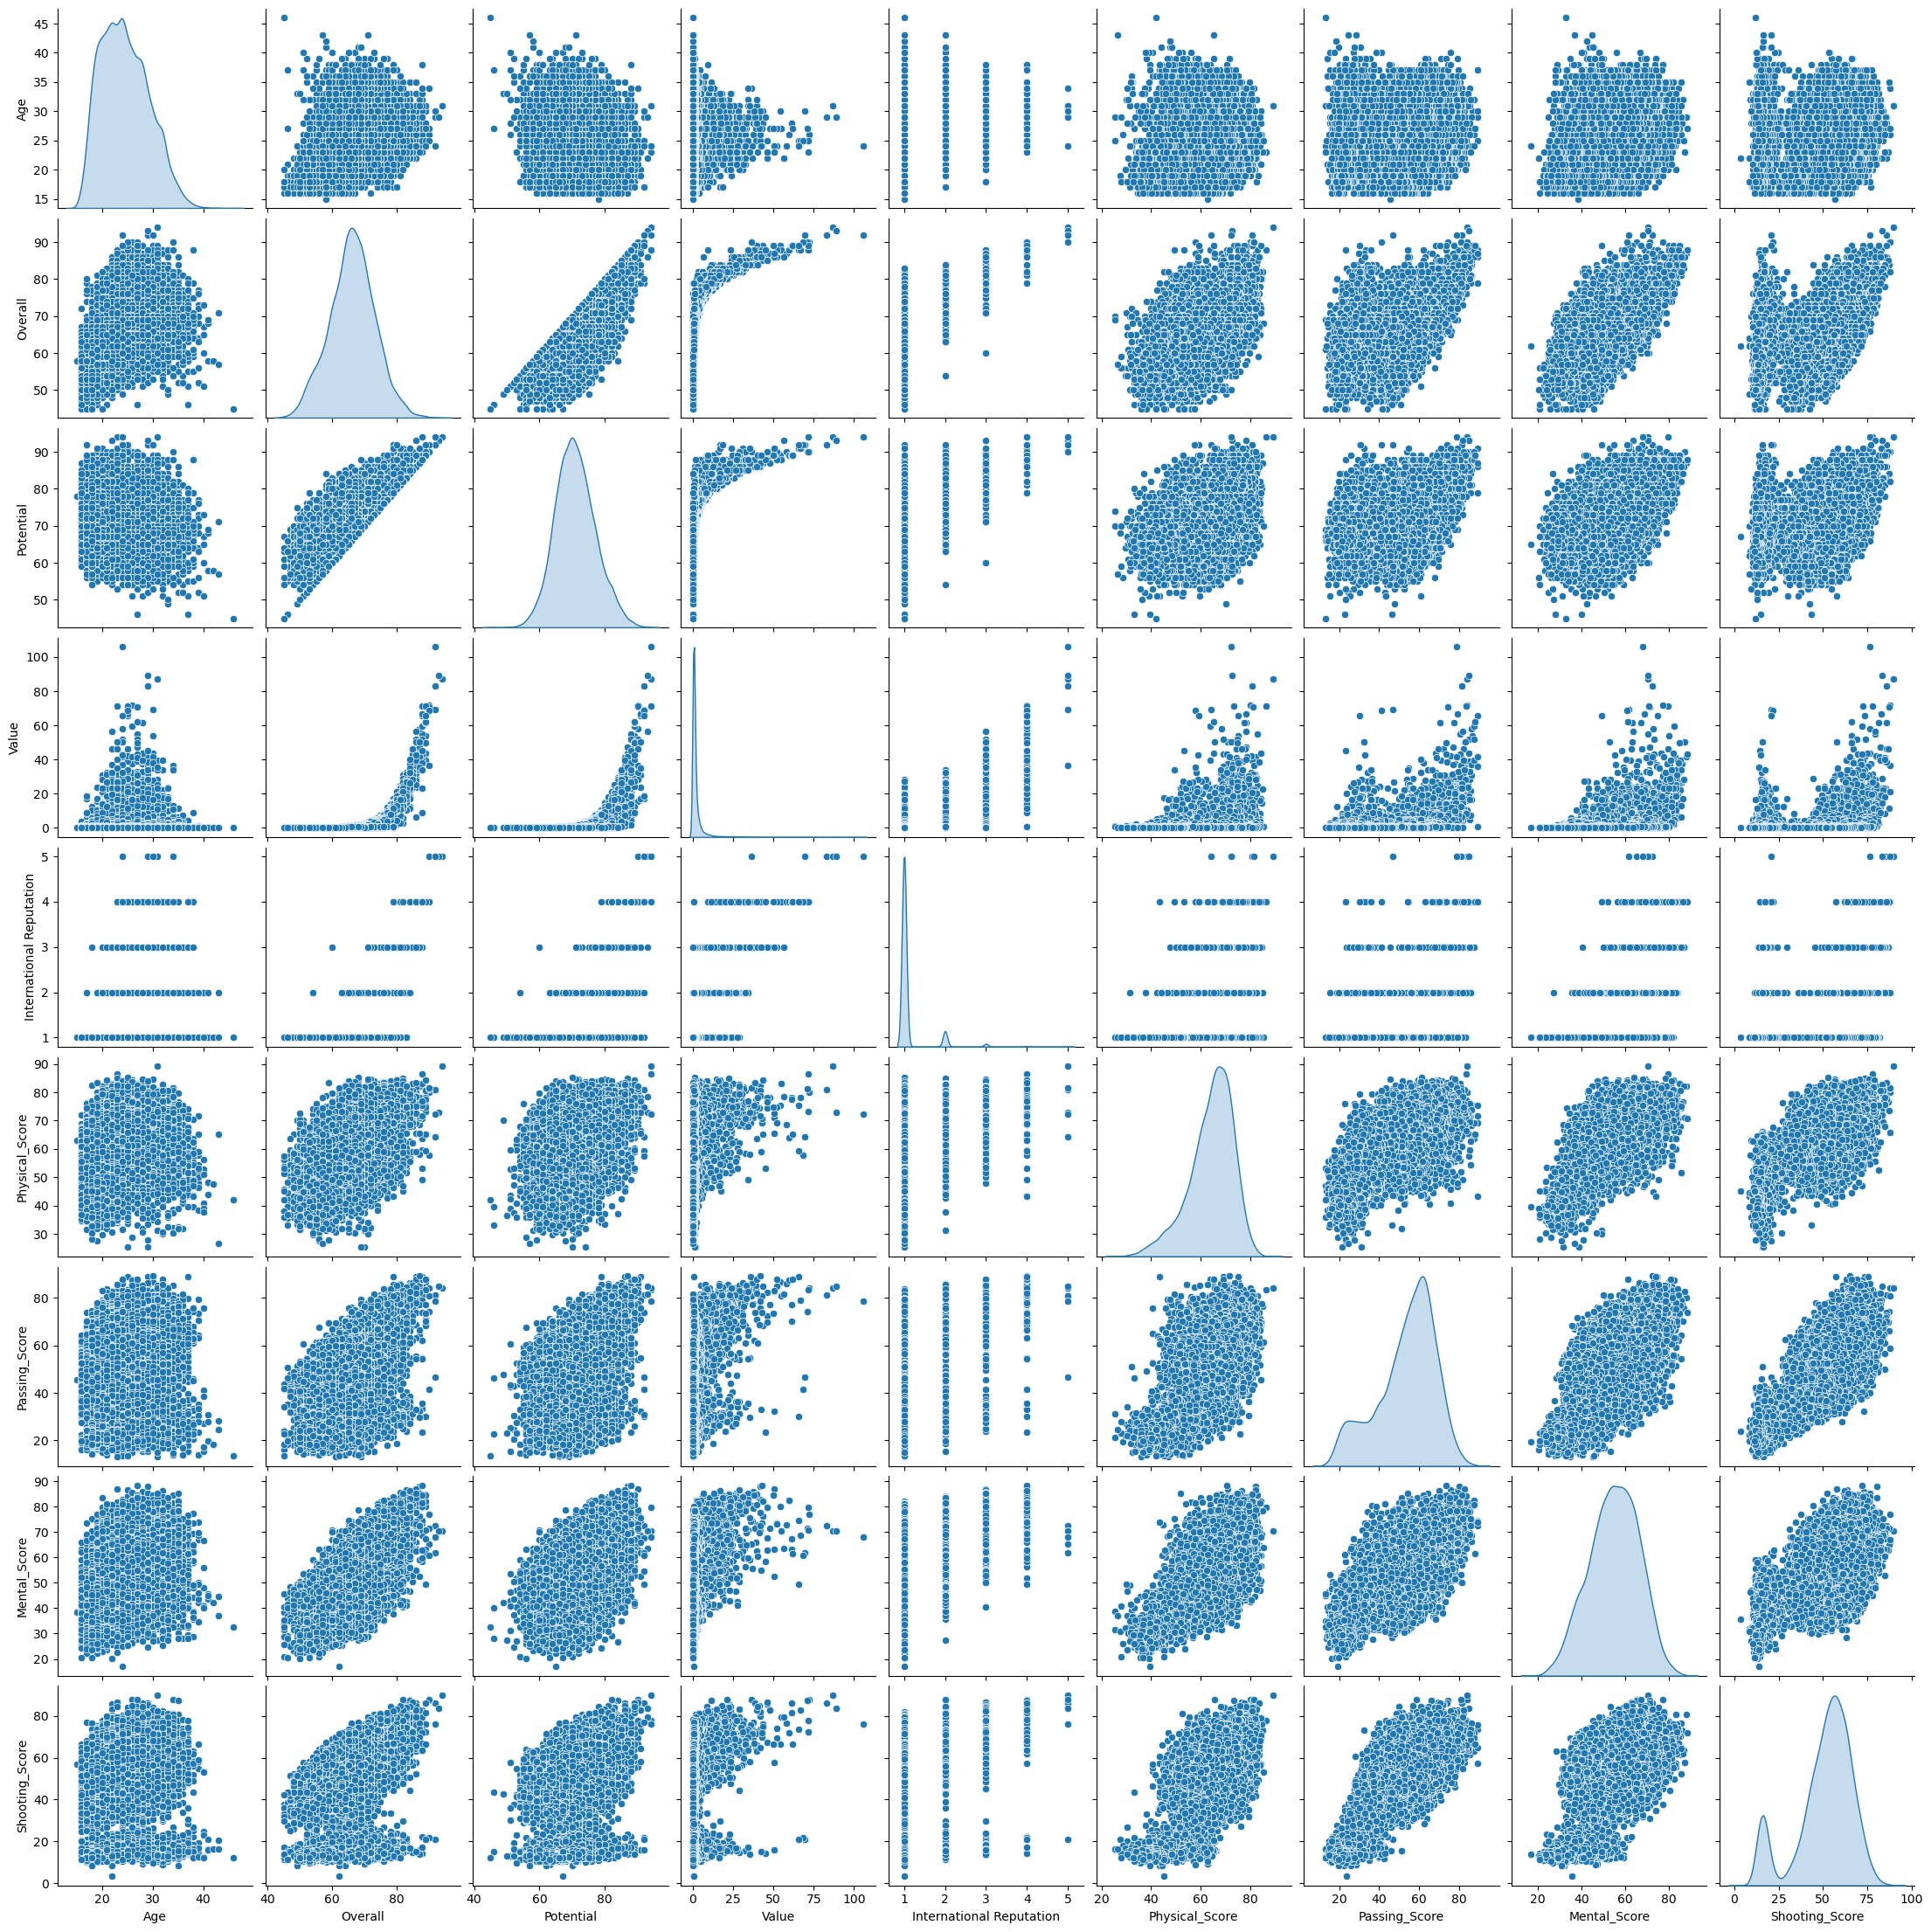

In [6431]:
sns.pairplot(num_df, kind='scatter', diag_kind='kde')
plt.show()

# Encoding
Convert categorical columns to numerical (e.g., using label encoding or one-hot encoding).

In [6432]:
# Columns for encoding
label_encode_cols = ['Preferred Foot']
one_hot_encode_cols = ['Position_Group', 'Build_Type']
ordinal_encode_cols = ['Attacking_WR', 'Defensive_WR', 'Height_Range']

# Apply Label Encoding
label_encoders = {}  # To store encoders for inverse transformation if needed
for col in label_encode_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Apply One-Hot Encoding using OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids dummy variable trap
encoded_features = one_hot_encoder.fit_transform(df[one_hot_encode_cols])  # Fit and transform

# Get feature names for the one-hot encoded columns
encoded_feature_names = one_hot_encoder.get_feature_names_out(one_hot_encode_cols)

# Create a DataFrame for the encoded features
df_encoded = pd.DataFrame(encoded_features, columns=encoded_feature_names, index=df.index)

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Drop the original columns that were one-hot encoded
df = df.drop(columns=one_hot_encode_cols, axis=1)

# Apply Ordinal Encoding for 'Attacking_WR', 'Defensive_WR', and 'Height_Range'
ordinal_mappings = {
    'Attacking_WR': {'Low': 1, 'Medium': 2, 'High': 3},
    'Defensive_WR': {'Low': 1, 'Medium': 2, 'High': 3},
    'Height_Range': {'170-': 1, '170-185': 2, '185+': 3, '190+': 4}
}

for col, mapping in ordinal_mappings.items():
    df[col] = df[col].map(mapping)

# Split data using new encoded values
num_df, num_col, cat_df, cat_col = split_data(df)


# Display the first few rows of the encoded dataframe
df.head()

Numerical Columns ( 19 ): 
 ['Age', 'Overall', 'Potential', 'Value', 'Preferred Foot', 'International Reputation', 'Physical_Score', 'Passing_Score', 'Mental_Score', 'Shooting_Score', 'Attacking_WR', 'Defensive_WR', 'Height_Range', 'Position_Group_Defender', 'Position_Group_Goalkeeper', 'Position_Group_Midfielder', 'Position_Group_Substitute', 'Build_Type_Normal', 'Build_Type_Stocky']
Catgeorical Columns( 0 ): 
 []


Age  Overall  Potential  Value  Preferred Foot  International Reputation  \
0   29       92         92   83.0               1                       5.0   
1   28       86         86   37.5               1                       3.0   
2   29       87         87   41.5               1                       4.0   
3   24       86         89   41.5               0                       4.0   
4   23       88         94   71.5               1                       4.0   

   Physical_Score  Passing_Score  Mental_Score  Shooting_Score  Attacking_WR  \
0           81.00      81.333333     72.333333       86.000000             3   
1           82.25      77.666667     86.000000       73.000000             3   
2           82.25      80.000000     88.000000       80.666667             3   
3           80.00      81.000000     82.666667       73.666667             3   
4           86.50      83.333333     79.666667       78.000000             3   

   Defensive_WR  Height_Range  Position_Group_Defender  \
0             2             2                      0.0   
1             3             2                      0.0   
2             3             2                      0.0   
3             2             2                      1.0   
4             2             3                      0.0   

   Position_Group_Goalkeeper  Position_Group_Midfielder  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        1.0   
3                        0.0                        0.0   
4                        0.0                        1.0   

   Position_Group_Substitute  Build_Type_Normal  Build_Type_Stocky  
0                        0.0                1.0                0.0  
1                        0.0                0.0                1.0  
2                        0.0                1.0                0.0  
3                        0.0                0.0                0.0  
4                        0.0                0.0                0.0

In [6433]:
df.dtypes

Age                            int64
Overall                        int64
Potential                      int64
Value                        float64
Preferred Foot                 int64
International Reputation     float64
Physical_Score               float64
Passing_Score                float64
Mental_Score                 float64
Shooting_Score               float64
Attacking_WR                   int64
Defensive_WR                   int64
Height_Range                   int64
Position_Group_Defender      float64
Position_Group_Goalkeeper    float64
Position_Group_Midfielder    float64
Position_Group_Substitute    float64
Build_Type_Normal            float64
Build_Type_Stocky            float64
dtype: object

In [6434]:
# Save the Label Encoders
label_encoder_path = 'label_encoders.pkl'
with open(label_encoder_path, 'wb') as file:
    pickle.dump(label_encoders, file)
print(f"Label encoders have been saved to {label_encoder_path}.")

# Save the OneHotEncoder instance
one_hot_encoder_path = 'one_hot_encoder.pkl'
with open(one_hot_encoder_path, 'wb') as file:
    pickle.dump(one_hot_encoder, file)
print(f"One-hot encoder has been saved to {one_hot_encoder_path}.")

# Save the one-hot feature list (optional for clarity in mapping during deployment)
one_hot_feature_list = one_hot_encoder.get_feature_names_out(one_hot_encode_cols).tolist()
one_hot_feature_list_path = 'one_hot_feature_list.pkl'
with open(one_hot_feature_list_path, 'wb') as file:
    pickle.dump(one_hot_feature_list, file)
print(f"One-hot feature list has been saved to {one_hot_feature_list_path}.")

# Save the ordinal mappings
ordinal_mapping_path = 'ordinal_mappings.pkl'
with open(ordinal_mapping_path, 'wb') as file:
    pickle.dump(ordinal_mappings, file)
print(f"Ordinal mappings have been saved to {ordinal_mapping_path}.")

Label encoders have been saved to label_encoders.pkl.
One-hot encoder has been saved to one_hot_encoder.pkl.
One-hot feature list has been saved to one_hot_feature_list.pkl.
Ordinal mappings have been saved to ordinal_mappings.pkl.


In [6435]:
# Load the Label Encoders
label_encoder_path = 'label_encoders.pkl'
with open(label_encoder_path, 'rb') as file:
    label_encoders = pickle.load(file)
print("Label encoders loaded successfully.")
print("Label Encoders:", label_encoders)

# Load the OneHotEncoder instance
one_hot_encoder_path = 'one_hot_encoder.pkl'
with open(one_hot_encoder_path, 'rb') as file:
    one_hot_encoder = pickle.load(file)
print("\nOneHotEncoder loaded successfully.")

# Load the one-hot encoded feature list
one_hot_feature_list_path = 'one_hot_feature_list.pkl'
with open(one_hot_feature_list_path, 'rb') as file:
    one_hot_feature_list = pickle.load(file)
print("\nOne-hot encoded feature list loaded successfully.")
print("One-Hot Feature List:", one_hot_feature_list)

# Load the Ordinal Mappings
ordinal_mapping_path = 'ordinal_mappings.pkl'
with open(ordinal_mapping_path, 'rb') as file:
    ordinal_mappings = pickle.load(file)
print("\nOrdinal mappings loaded successfully.")
print("Ordinal Mappings:", ordinal_mappings)

Label encoders loaded successfully.
Label Encoders: {'Preferred Foot': LabelEncoder()}

OneHotEncoder loaded successfully.

One-hot encoded feature list loaded successfully.
One-Hot Feature List: ['Position_Group_Defender', 'Position_Group_Goalkeeper', 'Position_Group_Midfielder', 'Position_Group_Substitute', 'Build_Type_Normal', 'Build_Type_Stocky']

Ordinal mappings loaded successfully.
Ordinal Mappings: {'Attacking_WR': {'Low': 1, 'Medium': 2, 'High': 3}, 'Defensive_WR': {'Low': 1, 'Medium': 2, 'High': 3}, 'Height_Range': {'170-': 1, '170-185': 2, '185+': 3, '190+': 4}}


# Splitting data into train and test datasets

In [6436]:
y = df['Overall']
X = df.drop('Overall', axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
Scale numerical features using Standard scaling.

In [6437]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Define the numerical columns to scale and categorical columns for merging
numerical_cols = ['Age', 'Potential', 'Value', 'International Reputation', 
                  'Physical_Score', 'Passing_Score', 'Mental_Score', 'Shooting_Score']

categorical_cols = ['Preferred Foot', 'Attacking_WR', 'Defensive_WR', 'Height_Range',
                    'Position_Group_Defender', 'Position_Group_Goalkeeper','Position_Group_Midfielder','Position_Group_Substitute',
                   'Build_Type_Normal', 'Build_Type_Stocky']

# Fit the scaler on the training set only
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])

# Transform the test set using the fitted scaler
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Check mean and standard deviation of scaled data
scaled_train_mean = X_train_scaled.mean(axis=0)  # Mean of each feature
scaled_train_std = X_train_scaled.std(axis=0)    # Std dev of each feature

print("Scaled Training Data Mean (should be close to 0):", scaled_train_mean)
print("Scaled Training Data Std Dev (should be close to 1):", scaled_train_std)

Scaled Training Data Mean (should be close to 0): [ 2.41070588e-17 -1.10200034e-15 -5.53949437e-17  5.05222403e-17
 -8.25794994e-17 -6.13447709e-16  1.22074043e-16 -2.46199750e-16]
Scaled Training Data Std Dev (should be close to 1): [1. 1. 1. 1. 1. 1. 1. 1.]


In [6438]:
# Pickle the scaler for future use
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("Scaling complete and scaler has been saved.")

Scaling complete and scaler has been saved.


In [6439]:
df.describe()

Age       Overall     Potential         Value  Preferred Foot  \
count  17317.000000  17317.000000  17317.000000  17317.000000    17317.000000   
mean      24.549576     66.143732     70.958538      1.957876        0.766645   
std        4.654937      7.022105      6.142191      4.675831        0.422978   
min       15.000000     45.000000     45.000000      0.000000        0.000000   
25%       21.000000     62.000000     67.000000      0.300000        1.000000   
50%       24.000000     66.000000     71.000000      0.675000        1.000000   
75%       28.000000     71.000000     75.000000      1.600000        1.000000   
max       46.000000     94.000000     94.000000    106.000000        1.000000   

       International Reputation  Physical_Score  Passing_Score  Mental_Score  \
count              17317.000000    17317.000000   17317.000000  17317.000000   
mean                   1.111624       64.194881      53.619719     54.821524   
std                    0.384742        8.925748      14.460201     11.359240   
min                    1.000000       25.250000      13.000000     17.000000   
25%                    1.000000       59.250000      45.333333     47.000000   
50%                    1.000000       65.500000      56.333333     55.333333   
75%                    1.000000       70.500000      64.000000     63.000000   
max                    5.000000       89.250000      89.333333     88.333333   

       Shooting_Score  Attacking_WR  Defensive_WR  Height_Range  \
count    17317.000000  17317.000000  17317.000000  17317.000000   
mean        51.094974      2.198302      2.068603      2.256164   
std         15.681506      0.514012      0.494512      0.568767   
min          3.333333      1.000000      1.000000      1.000000   
25%         44.333333      2.000000      2.000000      2.000000   
50%         54.000000      2.000000      2.000000      2.000000   
75%         61.666667      3.000000      2.000000      3.000000   
max         90.000000      3.000000      3.000000      4.000000   

       Position_Group_Defender  Position_Group_Goalkeeper  \
count             17317.000000               17317.000000   
mean                  0.145060                   0.035630   
std                   0.352171                   0.185371   
min                   0.000000                   0.000000   
25%                   0.000000                   0.000000   
50%                   0.000000                   0.000000   
75%                   0.000000                   0.000000   
max                   1.000000                   1.000000   

       Position_Group_Midfielder  Position_Group_Substitute  \
count               17317.000000               17317.000000   
mean                    0.152336                   0.603049   
std                     0.359357                   0.489280   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   1.000000   
75%                     0.000000                   1.000000   
max                     1.000000                   1.000000   

       Build_Type_Normal  Build_Type_Stocky  
count       17317.000000       17317.000000  
mean            0.593463           0.065485  
std             0.491201           0.247386  
min             0.000000           0.000000  
25%             0.000000           0.000000  
50%             1.000000           0.000000  
75%             1.000000           0.000000  
max             1.000000           1.000000

In [6440]:
# Convert scaled numerical columns to DataFrames
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)

# Select the categorical columns from X_train and X_test
X_train_encoded = X_train[categorical_cols]
X_test_encoded = X_test[categorical_cols]

# Combine scaled numerical columns and encoded categorical columns
X_train_combined = pd.concat([X_train_scaled_df, X_train_encoded], axis=1)
X_test_combined = pd.concat([X_test_scaled_df, X_test_encoded], axis=1)

# Verify the combined DataFrame
print(f"Combined Training Data Shape: {X_train_combined.shape}")
print(f"Combined Test Data Shape: {X_test_combined.shape}")
X_train_combined.head()

Combined Training Data Shape: (13853, 18)
Combined Test Data Shape: (3464, 18)


Age  Potential     Value  International Reputation  \
16241  0.102475   0.171089 -0.224184                  -0.28846   
10088  0.102475   0.823199  0.407488                  -0.28846   
10364 -1.618234   0.008061 -0.384663                  -0.28846   
964    0.747741   0.497144  0.179858                  -0.28846   
13601 -1.188057  -0.154966 -0.382386                  -0.28846   

       Physical_Score  Passing_Score  Mental_Score  Shooting_Score  \
16241       -1.918153      -1.492562     -1.503572       -1.936618   
10088        0.259009      -0.638849      0.138382        1.444885   
10364        0.147359       0.284083     -1.239687       -0.511708   
964          1.989573       0.837843      1.487131        1.104608   
13601       -1.220345      -0.546556      0.255665       -1.170995   

       Preferred Foot  Attacking_WR  Defensive_WR  Height_Range  \
16241               1             2             2             3   
10088               1             3             2             3   
10364               1             3             2             2   
964                 1             2             3             3   
13601               1             2             2             1   

       Position_Group_Defender  Position_Group_Goalkeeper  \
16241                      0.0                        0.0   
10088                      0.0                        0.0   
10364                      0.0                        0.0   
964                        0.0                        0.0   
13601                      0.0                        0.0   

       Position_Group_Midfielder  Position_Group_Substitute  \
16241                        0.0                        1.0   
10088                        0.0                        0.0   
10364                        0.0                        1.0   
964                          0.0                        1.0   
13601                        0.0                        1.0   

       Build_Type_Normal  Build_Type_Stocky  
16241                1.0                0.0  
10088                1.0                0.0  
10364                1.0                0.0  
964                  0.0                0.0  
13601                1.0                0.0

# Model Selection

Cross-Validation Results:
Linear Regression:
 R²: 0.897, MAE: 1.751, MSE: 5.087
Plotting learning curve for Linear Regression...


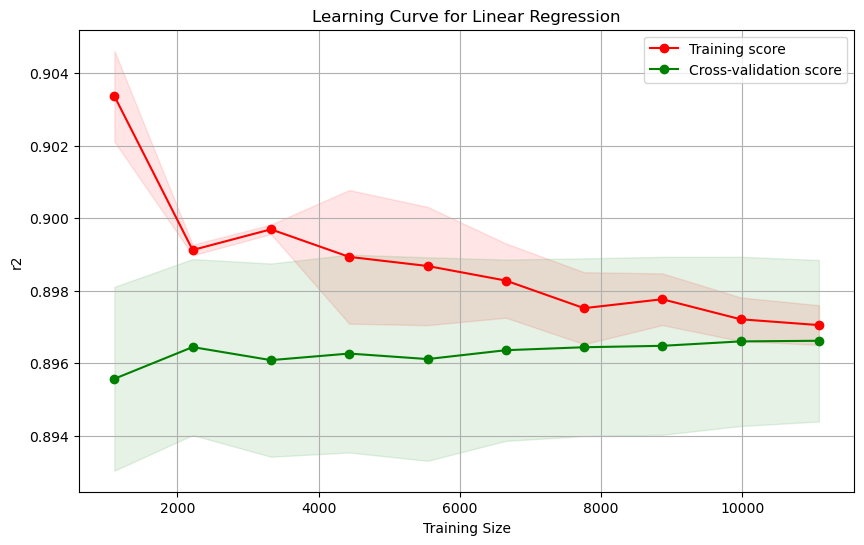

Ridge Regression:
 R²: 0.897, MAE: 1.751, MSE: 5.087
Plotting learning curve for Ridge Regression...


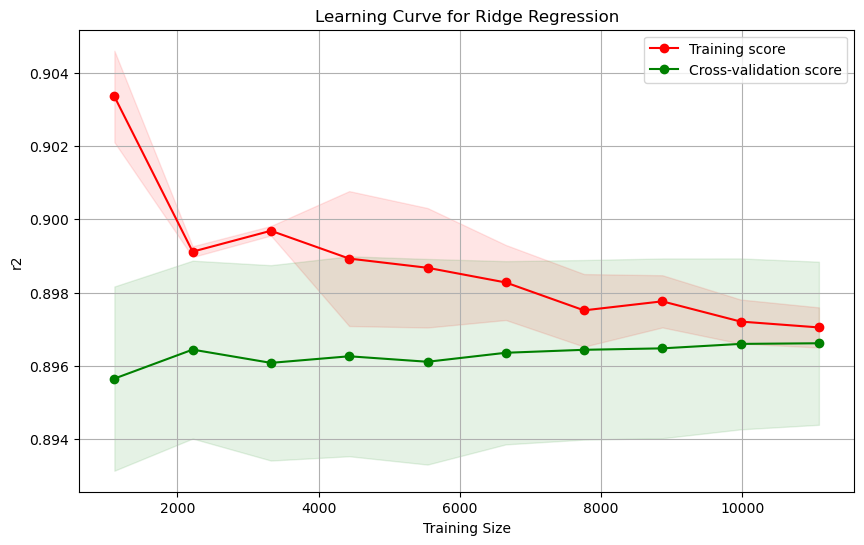

Lasso Regression:
 R²: 0.832, MAE: 2.266, MSE: 8.282
Plotting learning curve for Lasso Regression...


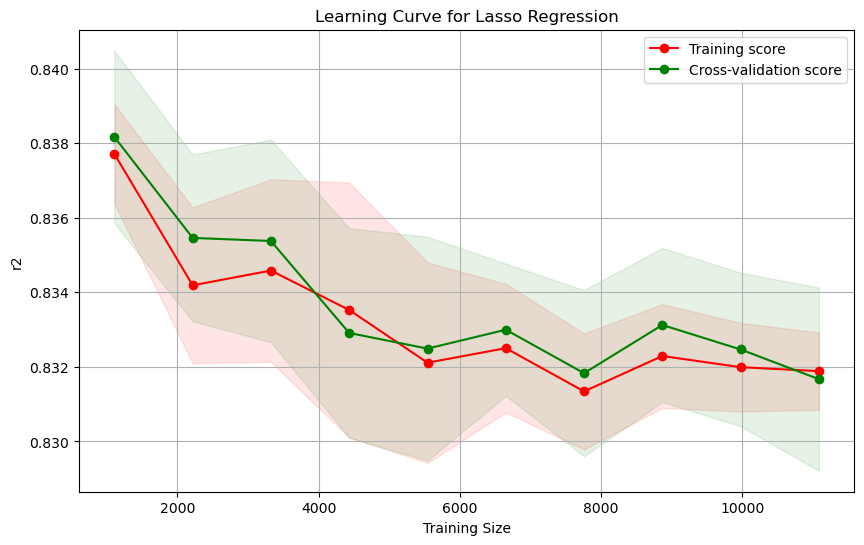

Decision Tree:
 R²: 0.992, MAE: 0.268, MSE: 0.414
Plotting learning curve for Decision Tree...


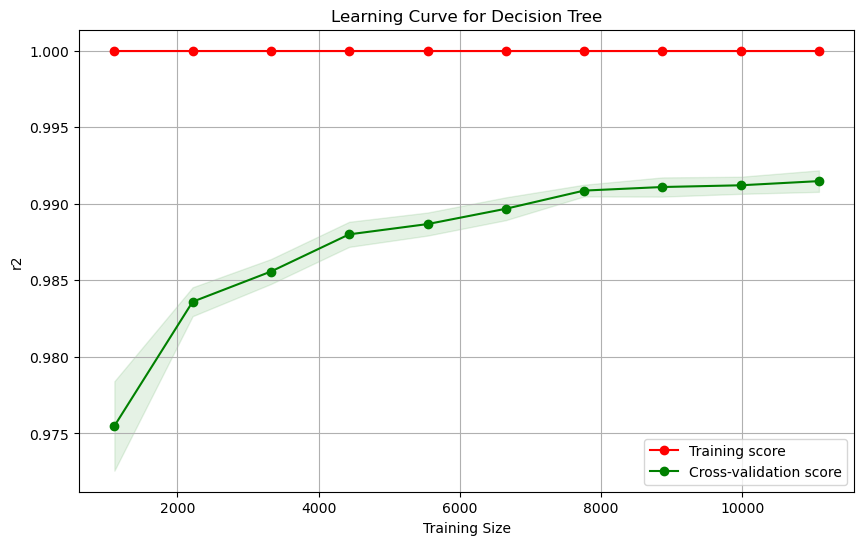

Random Forest:
 R²: 0.996, MAE: 0.252, MSE: 0.212
Plotting learning curve for Random Forest...


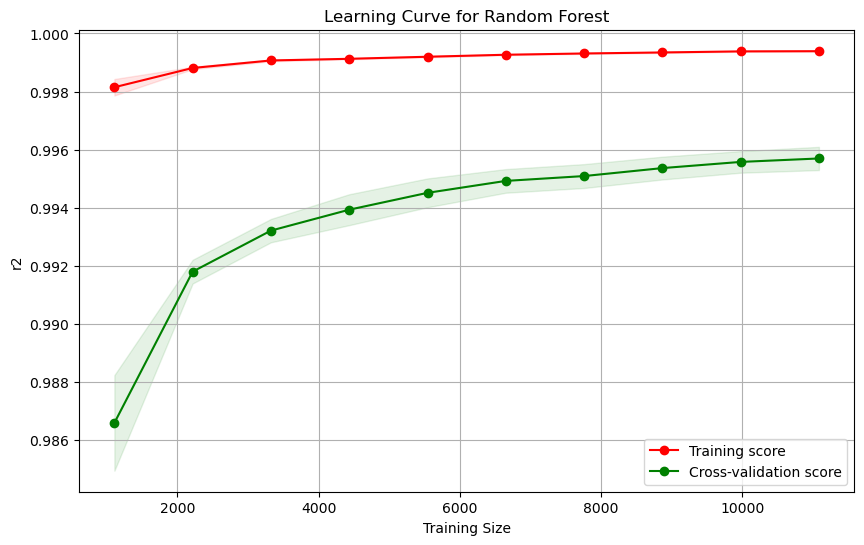

Gradient Boosting:
 R²: 0.991, MAE: 0.483, MSE: 0.447
Plotting learning curve for Gradient Boosting...


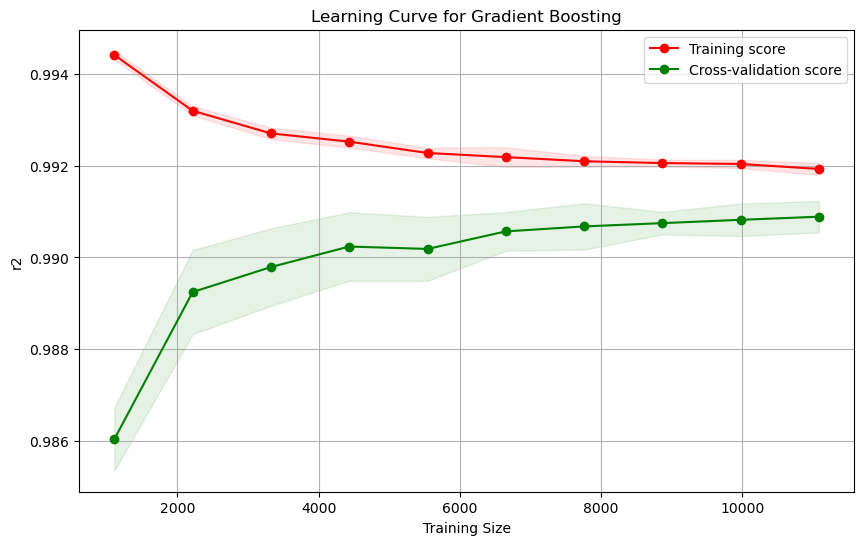

XGBoost:
 R²: 0.996, MAE: 0.290, MSE: 0.207
Plotting learning curve for XGBoost...


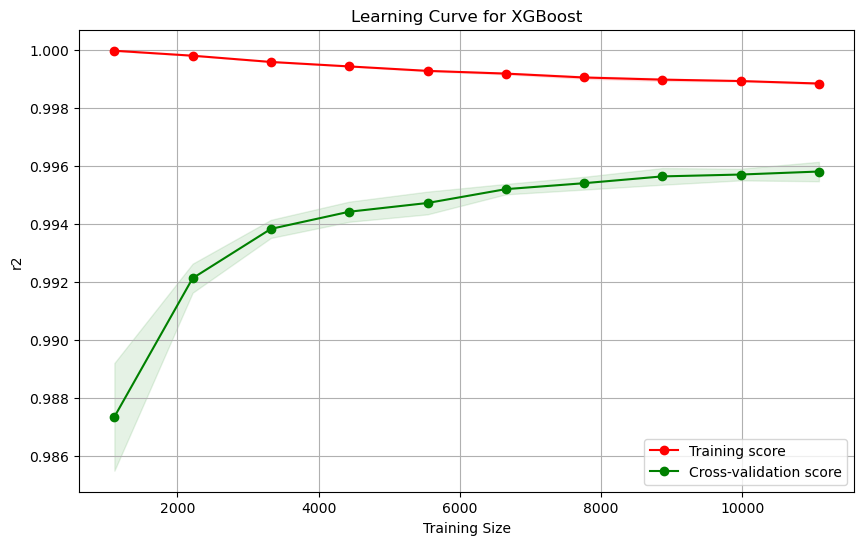

LightGBM:
 R²: 0.995, MAE: 0.325, MSE: 0.239
Plotting learning curve for LightGBM...


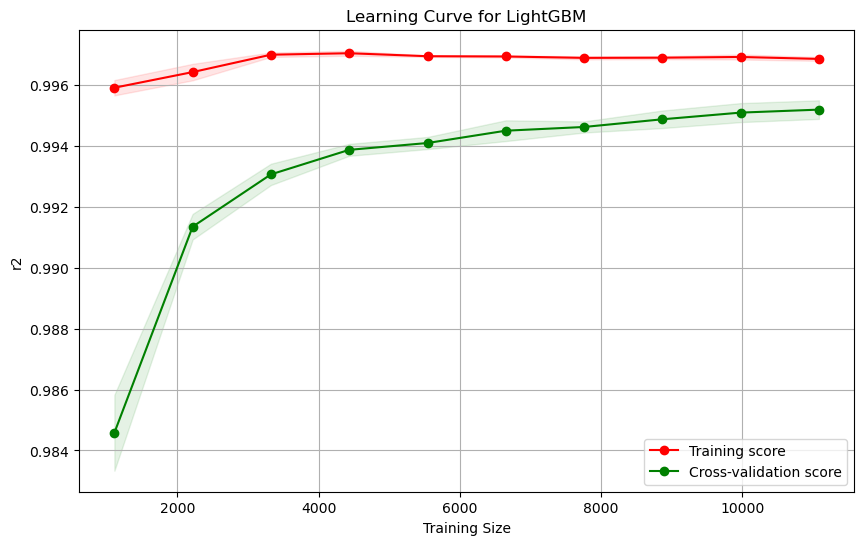

CatBoost:
 R²: 0.996, MAE: 0.312, MSE: 0.208
Plotting learning curve for CatBoost...


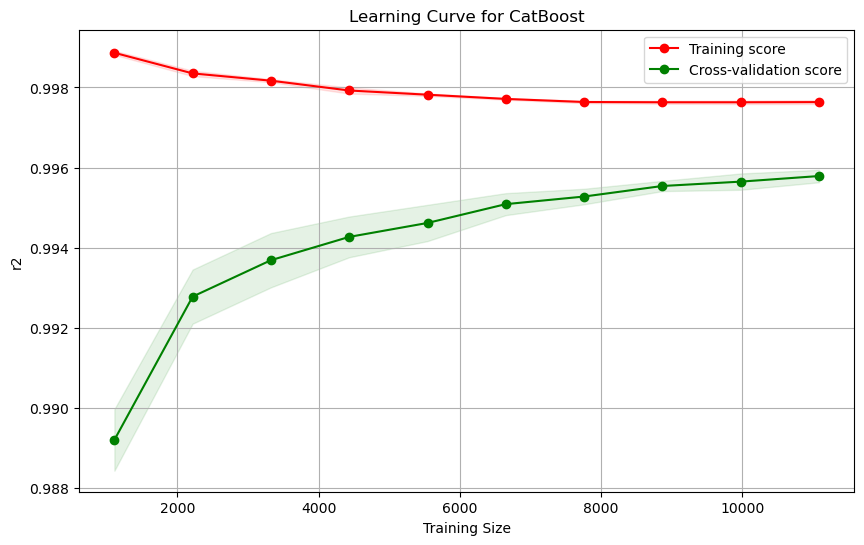

In [6441]:
from sklearn.metrics import make_scorer
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the function to plot learning curves
def plot_learning_curve(model, X, y, model_name, cv=5, scoring='r2'):
    """
    Plots learning curves to assess overfitting or underfitting.

    Args:
    model: Machine learning model (e.g., RandomForestRegressor)
    X: Features
    y: Target variable
    model_name: Name of the model (for plot title)
    cv: Number of cross-validation folds
    scoring: Scoring metric (default is R²)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    # Compute mean and standard deviation of training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.title(f"Learning Curve for {model_name}")
    plt.xlabel("Training Size")
    plt.ylabel(scoring)
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Define models to test
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'LightGBM': LGBMRegressor(random_state=42, verbose=-1),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0)
}

# Define custom scorers
scorers = {
    'R²': make_scorer(r2_score),
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error)
}

# Evaluate each model using cross-validation for all metrics
results = {}
print("Cross-Validation Results:")
for name, model in models.items():
    results[name] = {}
    for metric, scorer in scorers.items():
        cv_scores = cross_val_score(model, X_train_combined, y_train, cv=5, scoring=scorer)
        mean_cv_score = np.mean(cv_scores)
        results[name][metric] = mean_cv_score

    # Print results for each model
    print(f"{name}:\n R²: {results[name]['R²']:.3f}, MAE: {results[name]['MAE']:.3f}, MSE: {results[name]['MSE']:.3f}")

    # Plot learning curve for each model
    print(f"Plotting learning curve for {name}...")
    plot_learning_curve(model, X_train_combined, y_train, model_name=name, cv=5, scoring='r2')

In [6360]:
# Select top-performing models for hyperparameter tuning
top_models = ['Random Forest', 'XGBoost', 'LightGBM', 'CatBoost']

# Define hyperparameter grids for top models
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    'LightGBM': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'num_leaves': [31, 50],
        'max_depth': [-1, 10]
    },
    'CatBoost': {
        'iterations': [200, 500],
        'learning_rate': [0.03, 0.1],
        'depth': [6, 10]
    }
}

In [6363]:
# Dictionary to store the best models and their performance
best_models = {}
best_params = {}

# Loop through each model and perform GridSearchCV
for name in top_models:
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(
        estimator=models[name],
        param_grid=param_grids[name],
        scoring='r2',
        cv=5,
        n_jobs=-1
    )
    grid_search.fit(X_train_combined, y_train)  # Train the model on combined data
    
    # Save the best model and parameters
    best_models[name] = grid_search.best_estimator_
    best_params[name] = grid_search.best_params_

    # Evaluate the best model on the test set
    y_pred = best_models[name].predict(X_test_combined)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f"Best parameters for {name}: {best_params[name]}")
    print(f"{name} - R²: {r2:.3f}, MAE: {mae:.3f}, MSE: {mse:.3f}\n")

Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest - R²: 0.997, MAE: 0.228, MSE: 0.167

Tuning hyperparameters for XGBoost...
Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
XGBoost - R²: 0.996, MAE: 0.302, MSE: 0.182

Tuning hyperparameters for LightGBM...


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for LightGBM: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 50}
LightGBM - R²: 0.996, MAE: 0.275, MSE: 0.178

Tuning hyperparameters for CatBoost...
Best parameters for CatBoost: {'depth': 6, 'iterations': 500, 'learning_rate': 0.1}
CatBoost - R²: 0.996, MAE: 0.323, MSE: 0.208



In [6364]:
# Train the Random Forest Regressor with the best parameters
rf_model = RandomForestRegressor(
    n_estimators=300,         # From hyperparameter tuning
    max_depth=20,             # From hyperparameter tuning
    min_samples_leaf=1,       # From hyperparameter tuning
    min_samples_split=2,      # From hyperparameter tuning
    random_state=42           # To ensure reproducibility
)

# Train the model on the scaled training data
rf_model.fit(X_train_combined, y_train)

# Predict on the scaled test set
y_pred = rf_model.predict(X_test_combined)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Random Forest - R²: {r2:.3f}, MAE: {mae:.3f}, MSE: {mse:.3f}")

Random Forest - R²: 0.997, MAE: 0.228, MSE: 0.167



Top 10 Important Features:
                     Feature  Importance
2                      Value    0.899437
0                        Age    0.059850
1                  Potential    0.035688
7             Shooting_Score    0.001313
6               Mental_Score    0.001217
5              Passing_Score    0.000822
4             Physical_Score    0.000623
3   International Reputation    0.000411
11              Height_Range    0.000118
10              Defensive_WR    0.000087


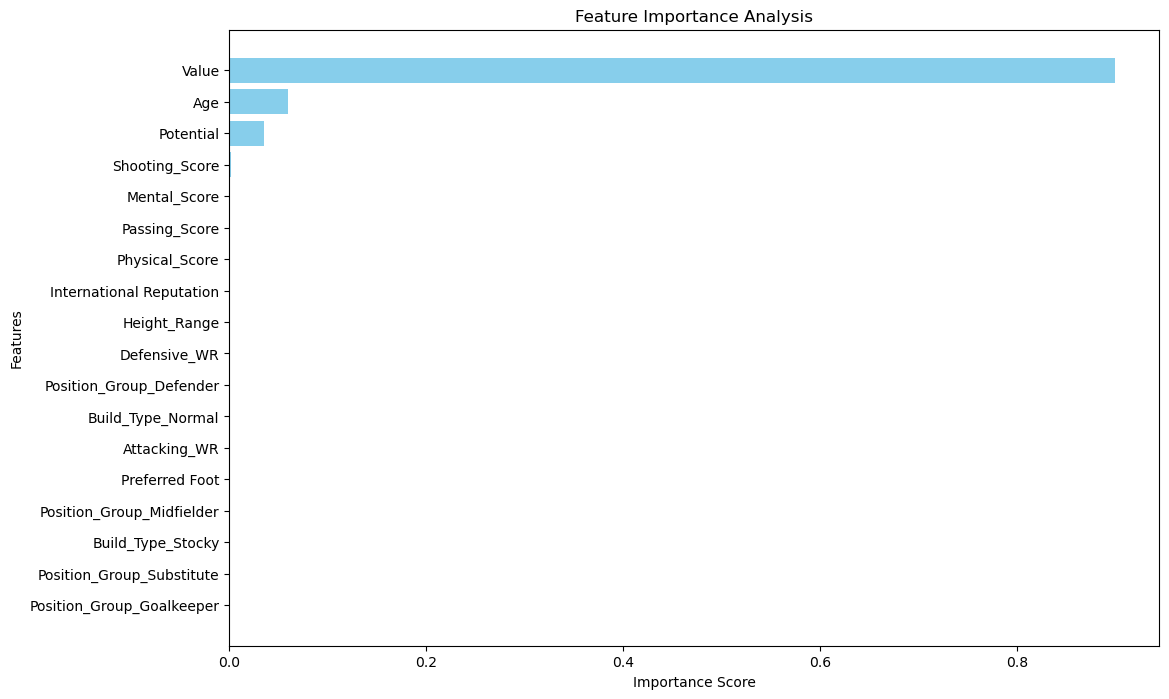

In [6366]:
# Feature importance analysis
feature_importances = rf_model.feature_importances_

# Convert feature importances to DataFrame using original column names
features_df = pd.DataFrame({
    'Feature': X_train_combined.columns,  # Use the original DataFrame's columns
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("\nTop 10 Important Features:")
print(features_df.head(10))

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

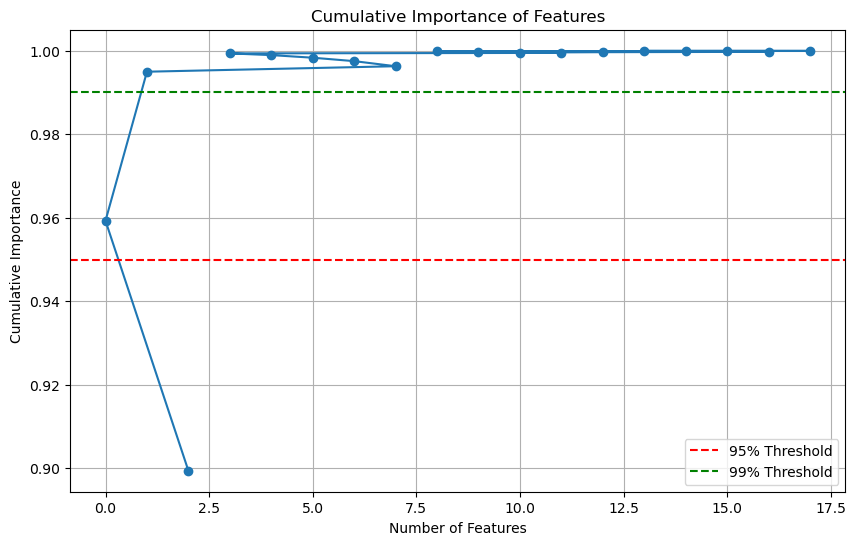

Number of features covering 95% of importance: 1


In [6367]:
# Sort features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Compute cumulative importance
features_df['Cumulative Importance'] = features_df['Importance'].cumsum()

# Plot cumulative importance
plt.figure(figsize=(10, 6))
plt.plot(features_df['Cumulative Importance'], marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.axhline(y=0.99, color='g', linestyle='--', label='99% Threshold')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importance of Features')
plt.legend()
plt.grid(True)
plt.show()

# Find the number of features needed for 95% importance
num_features_95 = (features_df['Cumulative Importance'] <= 0.95).sum()
print(f"Number of features covering 95% of importance: {num_features_95}")

In [6368]:
# Display the top 14 most important features
print("\nTop 10 Important Features:")
print(features_df)


Top 10 Important Features:
                      Feature  Importance  Cumulative Importance
2                       Value    0.899437               0.899437
0                         Age    0.059850               0.959287
1                   Potential    0.035688               0.994975
7              Shooting_Score    0.001313               0.996288
6                Mental_Score    0.001217               0.997505
5               Passing_Score    0.000822               0.998327
4              Physical_Score    0.000623               0.998950
3    International Reputation    0.000411               0.999361
11               Height_Range    0.000118               0.999479
10               Defensive_WR    0.000087               0.999566
12    Position_Group_Defender    0.000084               0.999649
16          Build_Type_Normal    0.000083               0.999732
9                Attacking_WR    0.000078               0.999810
8              Preferred Foot    0.000061               0.9998

# Exporting The Trained Model

In [6369]:
from joblib import dump, load

# Save the best model to a file
dump(rf_model, 'best_rf_model.joblib')
print("Model saved successfully as 'best_rf_model.joblib'.")

# Load the model from the file
loaded_model = load('best_rf_model.joblib')

# Test the loaded model by predicting on the test set
y_pred_loaded = loaded_model.predict(X_test_combined)
print(f"Loaded Model - R²: {r2_score(y_test, y_pred_loaded):.3f}")

Model saved successfully as 'best_rf_model.joblib'.
Loaded Model - R²: 0.997


In [6442]:
X_train_combined.columns.tolist()

['Age',
 'Potential',
 'Value',
 'International Reputation',
 'Physical_Score',
 'Passing_Score',
 'Mental_Score',
 'Shooting_Score',
 'Preferred Foot',
 'Attacking_WR',
 'Defensive_WR',
 'Height_Range',
 'Position_Group_Defender',
 'Position_Group_Goalkeeper',
 'Position_Group_Midfielder',
 'Position_Group_Substitute',
 'Build_Type_Normal',
 'Build_Type_Stocky']